In [1]:
## SPECIATION 
#
## INPUT - Tc, I, mT_cat, mT_an, OH
#
#  Tc      (degr. C) : scalar or vector of size n x 1
#  I              () : Ionic strength (I = 19.924.*S./(1000-1.005*S), S = salinity)
#  mT_cat   (mol/kg) : Total concentration  of major cations in seawater (Na, K, Mg, Ca, Sr)
#  mT_an    (mol\kg) : Total concentration  of major anions in seawater  (Cl, SO4, CO3, HCO3, Br, F, B(OH)4)
#  OH       (mol\kg) : Total concentration  of OH anion in seawater
#
## OUTPUT - mjcat_spec, mjcat_FREE, mjan_spec, mjan_FREE, mncat_spec, mncat_FREE, div_spec, 
#           div_FREE, triv_spec, triv_FREE
#
#  mjcat_spec     () : Major cations speciation [NaCl, NaSO4, NaCO3, NaHCO3, NaBr, NaF, NaB(OH)4, NaOH]
#                                               [ KCl,  KSO4,  KCO3,  KHCO3,  KBr,  KF,  KB(OH)4,  KOH]
#                                               [MgCl, MgSO4, MgCO3, MgHCO3, MgBr, MgF, MgB(OH)4, MgOH]
#                                               [CaCl, CaSO4, CaCO3, CaHCO3, CaBr, CaF, CaB(OH)4, CaOH]
#                                               [SrCl, SrSO4, SrCO3, SrHCO3, SrBr, SrF, SrB(OH)4, SrOH]
#
#  mjcat_FREE     () : Free major cations       [Na, K, Mg, Ca, Sr]
#
#  mjcat_spec and mjcat_FREE make up Table 3
#
#  mjan_spec      () : Major anion speciation   [    NaCl,     KCl,     MgCl,     CaCl,     SrCl] 
#                                               [   NaSO4,    KSO4,    MgSO4,    CaSO4,    SrSO4]
#                                               [   NaCO3,    KCO3,    MgCO3,    CaCO3,    SrCO3]
#                                               [  NaHCO3,   KHCO3,   MgHCO3,   CaHCO3,   SrHCO3]
#                                               [    NaBr,     KBr,     MgBr,     CaBr,     SrBr]
#                                               [     NaF,      KF,      MgF,      CaF,      SrF]
#                                               [NaB(OH)4, KB(OH)4, MgB(OH)4, CaB(OH)4, SrB(OH)4]
#                                               [    NaOH,     KOH,     MgOH,     CaOH,     SrOH]
#
#  mjan_FREE      () : Free major anions        [Cl, SO4, CO3, HCO3, Br, F, B(OH)4, OH]
#
## mjan_spec and mjan_FREE make up Table 4
#
#  mncat_spec     () : Minor cations speciation [  LiCl,     LiSO4,     LiCO3,     LiHCO3,   LiBr,   LiF,   LiOH]
#                                               [  RbCl,     RbSO4,     RbCO3,     RbHCO3,   RbBr,   RbF,   RbOH]
#                                               [  CsCl,     CsSO4,     CsCO3,     CsHCO3,   CsBr,   CsF,   CsOH]
#                                               [ NH4Cl,    NH4SO4,    NH4CO3,    NH4HCO3,  NH4Br,  NH4F,  NH4OH]
#                                               [  BaCl,     BaSO4,     BaCO3,     BaHCO3,   BaBr,   BaF,   BaOH]
#                                               [  MnCl,     MnSO4,     MnCO3,     MnHCO3,   MnBr,   MnF,   MnOH]
#                                               [  LaCl,     LaSO4,     LaCO3,     LaHCO3,   LaBr,   LaF,   LaOH]
#
#                                               [ LiCl2,  Li(SO4)2,  Li(CO3)2,  Li(HCO3)2,  LiBr2,  LiF2,  LiOH2]
#                                               [ RbCl2,  Rb(SO4)2,  Rb(CO3)2,  Rb(HCO3)2,  RbBr2,  RbF2,  RbOH2]
#                                               [ CsCl2,  Cs(SO4)2,  Cs(CO3)2,  Cs(HCO3)2,  CsBr2,  CsF2,  CsOH2]
#                                               [NH4Cl2, NH4(SO4)2, NH4(CO3)2, NH4(HCO3)2, NH4Br2, NH4F2, NH4OH2]
#                                               [ BaCl2,  Ba(SO4)2,  Ba(CO3)2,  Ba(HCO3)2,  BaBr2,  BaF2,  BaOH2]
#                                               [ MnCl2,  Mn(SO4)2,  Mn(CO3)2,  Mn(HCO3)2,  MnBr2,  MnF2,  MnOH2]
#                                               [ LaCl2,  La(SO4)2,  La(CO3)2,  La(HCO3)2,  LaBr2,  LaF2,  LaOH2]
#
#                                               [ LiCl3,  Li(SO4)3,  Li(CO3)3,  Li(HCO3)3,  LiBr3,  LiF3,  LiOH3]
#                                               [ RbCl3,  Rb(SO4)3,  Rb(CO3)3,  Rb(HCO3)3,  RbBr3,  RbF3,  RbOH3]
#                                               [ CsCl3,  Cs(SO4)3,  Cs(CO3)3,  Cs(HCO3)3,  CsBr3,  CsF3,  CsOH3]
#                                               [NH4Cl3, NH4(SO4)3, NH4(CO3)3, NH4(HCO3)3, NH4Br3, NH4F3, NH4OH3]
#                                               [ BaCl3,  Ba(SO4)3,  Ba(CO3)3,  Ba(HCO3)3,  BaBr3,  BaF3,  BaOH3]
#                                               [ MnCl3,  Mn(SO4)3,  Mn(CO3)3,  Mn(HCO3)3,  MnBr3,  MnF3,  MnOH3]
#                                               [ LaCl3,  La(SO4)3,  La(CO3)3,  La(HCO3)3,  LaBr3,  LaF3,  LaOH3]
#
#  mncat_FREE     () : Free minor cations       [Li, Rb, Cs, NH4, Ba, Mn, La]
#
#  div_spec       () : Divalent speciation      [ Fe(II)Cl,    Fe(II)SO4,    Fe(II)CO3,    Fe(II)HCO3,  Fe(II)F,  Fe(II)OH]
#                                               [     CoCl,        CoSO4,        CoCO3,        CoHCO3,      CoF,      CoOH]
#                                               [     NiCl,        NiSO4,        NiCO3,        NiHCO3,      NiF,      NiOH]
#                                               [ Cu(II)Cl,    Cu(II)SO4,    Cu(II)CO3,    Cu(II)HCO3,  Cu(II)F,  Cu(II)OH]
#                                               [     ZnCl,        ZnSO4,        ZnCO3,        ZnHCO3,      ZnF,      ZnOH]
#                                               [    UO2Cl,       UO2SO4,       UO2CO3,       UO2HCO3,     UO2F,     UO2OH]
#                                               [     BeCl,        BeSO4,        BeCO3,        BeHCO3,      BeF,      BeOH]
#                                               [     CdCl,        CdSO4,        CdCO3,        CdHCO3,      CdF,      CdOH]
#                                               [ Pb(II)Cl,    Pb(II)SO4,    Pb(II)CO3,    Pb(II)HCO3,  Pb(II)F,  Pb(II)OH]
#                                               [  Cu(I)Cl,     Cu(I)SO4,     Cu(I)CO3,     Cu(I)HCO3,   Cu(I)F,   Cu(I)OH]
#
#                                               [Fe(II)Cl2, Fe(II)(SO4)2, Fe(II)(CO3)2, Fe(II)(HCO3)2, Fe(II)F2, Fe(II)OH2]
#                                               [    CoCl2,     Co(SO4)2,     Co(CO3)2,     Co(HCO3)2,     CoF2,     CoOH2]
#                                               [    NiCl2,     Ni(SO4)2,     Ni(CO3)2,     Ni(HCO3)2,     NiF2,     NiOH2]
#                                               [Cu(II)Cl2, Cu(II)(SO4)2, Cu(II)(CO3)2, Cu(II)(HCO3)2, Cu(II)F2, Cu(II)OH2]
#                                               [    ZnCl2,     Zn(SO4)2,     Zn(CO3)2,     Zn(HCO3)2,     ZnF2,     ZnOH2]
#                                               [   UO2Cl2,    UO2(SO4)2,    UO2(CO3)2,    UO2(HCO3)2,    UO2F2,    UO2OH2]
#                                               [    BeCl2,     Be(SO4)2,     Be(CO3)2,     Be(HCO3)2,     BeF2,     BeOH2]
#                                               [    CdCl2,     Cd(SO4)2,     Cd(CO3)2,     Cd(HCO3)2,     CdF2,     CdOH2]
#                                               [Pb(II)Cl2, Pb(II)(SO4)2, Pb(II)(CO3)2, Pb(II)(HCO3)2, Pb(II)F2, Pb(II)OH2]
#                                               [ Cu(I)Cl2,  Cu(I)(SO4)2,  Cu(I)(CO3)2,  Cu(I)(HCO3)2,  Cu(I)F2,  Cu(I)OH2]
#
#                                               [Fe(II)Cl3, Fe(II)(SO4)3, Fe(II)(CO3)3, Fe(II)(HCO3)3, Fe(II)F3, Fe(II)OH3]
#                                               [    CoCl3,     Co(SO4)3,     Co(CO3)3,     Co(HCO3)3,     CoF3,     CoOH3]
#                                               [    NiCl3,     Ni(SO4)3,     Ni(CO3)3,     Ni(HCO3)3,     NiF3,     NiOH3]
#                                               [Cu(II)Cl3, Cu(II)(SO4)3, Cu(II)(CO3)3, Cu(II)(HCO3)3, Cu(II)F3, Cu(II)OH3]
#                                               [    ZnCl3,     Zn(SO4)3,     Zn(CO3)3,     Zn(HCO3)3,     ZnF3,     ZnOH3]
#                                               [   UO2Cl3,    UO2(SO4)3,    UO2(CO3)3,    UO2(HCO3)3,    UO2F3,    UO2OH3]
#                                               [    BeCl3,     Be(SO4)3,     Be(CO3)3,     Be(HCO3)3,     BeF3,     BeOH3]
#                                               [    CdCl3,     Cd(SO4)3,     Cd(CO3)3,     Cd(HCO3)3,     CdF3,     CdOH3]
#                                               [Pb(II)Cl3, Pb(II)(SO4)3, Pb(II)(CO3)3, Pb(II)(HCO3)3, Pb(II)F3, Pb(II)OH3]
#                                               [ Cu(I)Cl3,  Cu(I)(SO4)3,  Cu(I)(CO3)3,  Cu(I)(HCO3)3,  Cu(I)F3,  Cu(I)OH3]
#
#                                               [Fe(II)Cl4, Fe(II)(SO4)4, Fe(II)(CO3)4, Fe(II)(HCO3)4, Fe(II)F4, Fe(II)OH4]
#                                               [    CoCl4,     Co(SO4)4,     Co(CO3)4,     Co(HCO3)4,     CoF4,     CoOH4]
#                                               [    NiCl4,     Ni(SO4)4,     Ni(CO3)4,     Ni(HCO3)4,     NiF4,     NiOH4]
#                                               [Cu(II)Cl4, Cu(II)(SO4)4, Cu(II)(CO3)4, Cu(II)(HCO3)4, Cu(II)F4, Cu(II)OH4]
#                                               [    ZnCl4,     Zn(SO4)4,     Zn(CO3)4,     Zn(HCO3)4,     ZnF4,     ZnOH4]
#                                               [   UO2Cl4,    UO2(SO4)4,    UO2(CO3)4,    UO2(HCO3)4,    UO2F4,    UO2OH4]
#                                               [    BeCl4,     Be(SO4)4,     Be(CO3)4,     Be(HCO3)4,     BeF4,     BeOH4]
#                                               [    CdCl4,     Cd(SO4)4,     Cd(CO3)4,     Cd(HCO3)4,     CdF4,     CdOH4]
#                                               [Pb(II)Cl4, Pb(II)(SO4)4, Pb(II)(CO3)4, Pb(II)(HCO3)4, Pb(II)F4, Pb(II)OH4]
#                                               [ Cu(I)Cl4,  Cu(I)(SO4)4,  Cu(I)(CO3)4,  Cu(I)(HCO3)4,  Cu(I)F4,  Cu(I)OH4]
#
#  div_FREE       () : Free divalent cations    [Fe(II), Co, Ni, Cu(II), Zn, UO2, Be, Cd, Pb(II), Cu(I)]
#
#  triv_spec      () : Divalent speciation      [      LaCl,         LaSO4,         LaCO3,         LaHCO3,       LaF,       LaOH]
#                                               [      CeCl,         CeSO4,         CeCO3,         CeHCO3,       CeF,       CeOH]
#                                               [      PrCl,         PrSO4,         PrCO3,         PrHCO3,       PrF,       PrOH]
#                                               [      NdCl,         NdSO4,         NdCO3,         NdHCO3,       NdF,       NdOH]
#                                               [      PmCl,         PmSO4,         PmCO3,         PmHCO3,       PmF,       PmOH]
#                                               [      SmCl,         SmSO4,         SmCO3,         SmHCO3,       SmF,       SmOH]
#                                               [      EuCl,         EuSO4,         EuCO3,         EuHCO3,       EuF,       EuOH]
#                                               [      GdCl,         GdSO4,         GdCO3,         GdHCO3,       GdF,       GdOH]
#                                               [      TbCl,         TbSO4,         TbCO3,         TbHCO3,       TbF,       TbOH]
#                                               [      DyCl,         DySO4,         DyCO3,         DyHCO3,       DyF,       DyOH]
#                                               [      HoCl,         HoSO4,         HoCO3,         HoHCO3,       HoF,       HoOH]
#                                               [      ErCl,         ErSO4,         ErCO3,         ErHCO3,       ErF,       ErOH]
#                                               [      TmCl,         TmSO4,         TmCO3,         TmHCO3,       TmF,       TmOH]
#                                               [      YbCl,         YbSO4,         YbCO3,         YbHCO3,       YbF,       YbOH]
#                                               [      LuCl,         LuSO4,         LuCO3,         LuHCO3,       LuF,       LuOH]
#                                               [       YCl,          YSO4,          YCO3,          YHCO3,        YF,        YOH]
#                                               [      AlCl,         AlSO4,         AlCO3,         AlHCO3,       AlF,       AlOH]
#                                               [      GaCl,         GaSO4,         GaCO3,         GaHCO3,       GaF,       GaOH]
#                                               [      InCl,         InSO4,         InCO3,         InHCO3,       InF,       InOH]
#                                               [ Fe(III)Cl,    Fe(III)SO4,    Fe(III)CO3,    Fe(III)HCO3,  Fe(III)F,  Fe(III)OH]
#
#                                               [     LaCl2,      La(SO4)2,      La(CO3)2,      La(HCO3)2,      LaF2,      LaOH2]
#                                               [     CeCl2,      Ce(SO4)2,      Ce(CO3)2,      Ce(HCO3)2,      CeF2,      CeOH2]
#                                               [     PrCl2,      Pr(SO4)2,      Pr(CO3)2,      Pr(HCO3)2,      PrF2,      PrOH2]
#                                               [     NdCl2,      Nd(SO4)2,      Nd(CO3)2,      Nd(HCO3)2,      NdF2,      NdOH2]
#                                               [     PmCl2,      Pm(SO4)2,      Pm(CO3)2,      Pm(HCO3)2,      PmF2,      PmOH2]
#                                               [     SmCl2,      Sm(SO4)2,      Sm(CO3)2,      Sm(HCO3)2,      SmF2,      SmOH2]
#                                               [     EuCl2,      Eu(SO4)2,      Eu(CO3)2,      Eu(HCO3)2,      EuF2,      EuOH2]
#                                               [     GdCl2,      Gd(SO4)2,      Gd(CO3)2,      Gd(HCO3)2,      GdF2,      GdOH2]
#                                               [     TbCl2,      Tb(SO4)2,      Tb(CO3)2,      Tb(HCO3)2,      TbF2,      TbOH2]
#                                               [     DyCl2,      Dy(SO4)2,      Dy(CO3)2,      Dy(HCO3)2,      DyF2,      DyOH2]
#                                               [     HoCl2,      Ho(SO4)2,      Ho(CO3)2,      Ho(HCO3)2,      HoF2,      HoOH2]
#                                               [     ErCl2,      Er(SO4)2,      Er(CO3)2,      Er(HCO3)2,      ErF2,      ErOH2]
#                                               [     TmCl2,      Tm(SO4)2,      Tm(CO3)2,      Tm(HCO3)2,      TmF2,      TmOH2]
#                                               [     YbCl2,      Yb(SO4)2,      Yb(CO3)2,      Yb(HCO3)2,      YbF2,      YbOH2]
#                                               [     LuCl2,      Lu(SO4)2,      Lu(CO3)2,      Lu(HCO3)2,      LuF2,      LuOH2]
#                                               [      YCl2,       Y(SO4)2,       Y(CO3)2,       Y(HCO3)2,       YF2,       YOH2]
#                                               [     AlCl2,      Al(SO4)2,      Al(CO3)2,      Al(HCO3)2,      AlF2,      AlOH2]
#                                               [     GaCl2,      Ga(SO4)2,      Ga(CO3)2,      Ga(HCO3)2,      GaF2,      GaOH2]
#                                               [     InCl2,      In(SO4)2,      In(CO3)2,      In(HCO3)2,      InF2,      InOH2]
#                                               [Fe(III)Cl2, Fe(III)(SO4)2, Fe(III)(CO3)2, Fe(III)(HCO3)2, Fe(III)F2, Fe(III)OH2]
#
#                                               [     LaCl3,      La(SO4)3,      La(CO3)3,      La(HCO3)3,      LaF3,      LaOH3]
#                                               [     CeCl3,      Ce(SO4)3,      Ce(CO3)3,      Ce(HCO3)3,      CeF3,      CeOH3]
#                                               [     PrCl3,      Pr(SO4)3,      Pr(CO3)3,      Pr(HCO3)3,      PrF3,      PrOH3]
#                                               [     NdCl3,      Nd(SO4)3,      Nd(CO3)3,      Nd(HCO3)3,      NdF3,      NdOH3]
#                                               [     PmCl3,      Pm(SO4)3,      Pm(CO3)3,      Pm(HCO3)3,      PmF3,      PmOH3]
#                                               [     SmCl3,      Sm(SO4)3,      Sm(CO3)3,      Sm(HCO3)3,      SmF3,      SmOH3]
#                                               [     EuCl3,      Eu(SO4)3,      Eu(CO3)3,      Eu(HCO3)3,      EuF3,      EuOH3]
#                                               [     GdCl3,      Gd(SO4)3,      Gd(CO3)3,      Gd(HCO3)3,      GdF3,      GdOH3]
#                                               [     TbCl3,      Tb(SO4)3,      Tb(CO3)3,      Tb(HCO3)3,      TbF3,      TbOH3]
#                                               [     DyCl3,      Dy(SO4)3,      Dy(CO3)3,      Dy(HCO3)3,      DyF3,      DyOH3]
#                                               [     HoCl3,      Ho(SO4)3,      Ho(CO3)3,      Ho(HCO3)3,      HoF3,      HoOH3]
#                                               [     ErCl3,      Er(SO4)3,      Er(CO3)3,      Er(HCO3)3,      ErF3,      ErOH3]
#                                               [     TmCl3,      Tm(SO4)3,      Tm(CO3)3,      Tm(HCO3)3,      TmF3,      TmOH3]
#                                               [     YbCl3,      Yb(SO4)3,      Yb(CO3)3,      Yb(HCO3)3,      YbF3,      YbOH3]
#                                               [     LuCl3,      Lu(SO4)3,      Lu(CO3)3,      Lu(HCO3)3,      LuF3,      LuOH3]
#                                               [      YCl3,       Y(SO4)3,       Y(CO3)3,       Y(HCO3)3,       YF3,       YOH3]
#                                               [     AlCl3,      Al(SO4)3,      Al(CO3)3,      Al(HCO3)3,      AlF3,      AlOH3]
#                                               [     GaCl3,      Ga(SO4)3,      Ga(CO3)3,      Ga(HCO3)3,      GaF3,      GaOH3]
#                                               [     InCl3,      In(SO4)3,      In(CO3)3,      In(HCO3)3,      InF3,      InOH3]
#                                               [Fe(III)Cl3, Fe(III)(SO4)3, Fe(III)(CO3)3, Fe(III)(HCO3)3, Fe(III)F3, Fe(III)OH3]
#
#                                               [     LaCl4,      La(SO4)4,      La(CO3)4,      La(HCO3)4,      LaF4,      LaOH4]
#                                               [     CeCl4,      Ce(SO4)4,      Ce(CO3)4,      Ce(HCO3)4,      CeF4,      CeOH4]
#                                               [     PrCl4,      Pr(SO4)4,      Pr(CO3)4,      Pr(HCO3)4,      PrF4,      PrOH4]
#                                               [     NdCl4,      Nd(SO4)4,      Nd(CO3)4,      Nd(HCO3)4,      NdF4,      NdOH4]
#                                               [     PmCl4,      Pm(SO4)4,      Pm(CO3)4,      Pm(HCO3)4,      PmF4,      PmOH4]
#                                               [     SmCl4,      Sm(SO4)4,      Sm(CO3)4,      Sm(HCO3)4,      SmF4,      SmOH4]
#                                               [     EuCl4,      Eu(SO4)4,      Eu(CO3)4,      Eu(HCO3)4,      EuF4,      EuOH4]
#                                               [     GdCl4,      Gd(SO4)4,      Gd(CO3)4,      Gd(HCO3)4,      GdF4,      GdOH4]
#                                               [     TbCl4,      Tb(SO4)4,      Tb(CO3)4,      Tb(HCO3)4,      TbF4,      TbOH4]
#                                               [     DyCl4,      Dy(SO4)4,      Dy(CO3)4,      Dy(HCO3)4,      DyF4,      DyOH4]
#                                               [     HoCl4,      Ho(SO4)4,      Ho(CO3)4,      Ho(HCO3)4,      HoF4,      HoOH4]
#                                               [     ErCl4,      Er(SO4)4,      Er(CO3)4,      Er(HCO3)4,      ErF4,      ErOH4]
#                                               [     TmCl4,      Tm(SO4)4,      Tm(CO3)4,      Tm(HCO3)4,      TmF4,      TmOH4]
#                                               [     YbCl4,      Yb(SO4)4,      Yb(CO3)4,      Yb(HCO3)4,      YbF4,      YbOH4]
#                                               [     LuCl4,      Lu(SO4)4,      Lu(CO3)4,      Lu(HCO3)4,      LuF4,      LuOH4]
#                                               [      YCl4,       Y(SO4)4,       Y(CO3)4,       Y(HCO3)4,       YF4,       YOH4]
#                                               [     AlCl4,      Al(SO4)4,      Al(CO3)4,      Al(HCO3)4,      AlF4,      AlOH4]
#                                               [     GaCl4,      Ga(SO4)4,      Ga(CO3)4,      Ga(HCO3)4,      GaF4,      GaOH4]
#                                               [     InCl4,      In(SO4)4,      In(CO3)4,      In(HCO3)4,      InF4,      InOH4]
#                                               [Fe(III)Cl4, Fe(III)(SO4)4, Fe(III)(CO3)4, Fe(III)(HCO3)3, Fe(III)F4, Fe(III)OH4]
#
#  triv_FREE      () : Free trivalent cations   [La, Ce, Pr, Nd, Pm, Sm, Eu, Gd, Tb, Dy, Ho, Er, Tm, Yb, Lu, Y, Al, Ga, In, Fe(III)]
#
#
# *****************************************************************************************************************

In [1]:
%run Speciation.ipynb

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
[[1.75754254e-01 5.01187234e+00 1.86208714e+01 5.62341325e-01
  4.67339067e-02 1.06959380e-01 1.65958691e+00 6.60693448e-01]
 [3.35809321e-02 7.0264

[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
[[-1.04419906e+01 -5.67174834e+01 -2.02702896e+00 ... -4.56057000e+01
  -6.33375600e+01  1.42600000e-01]
 [-1.85012170e+01 -3.74507973e+01 -5.52180705e-01 ...  0.00000000e+00
   0.00000000e+00  1.58700000e-01]
 [ 5.53145847e-01 -1.91983514e+02  0.00000000e+00 ...  3.50000000e-01
  -2.80000000e+00  0.00000000e+00]
 ...
 [ 8.25400000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.12000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+

[[6.13834426e-01 5.80717464e-01 1.85335228e-01 1.78824768e-01
  1.74704322e-01 6.99975028e-01 6.74752887e-01 5.61099256e-01
  5.17602103e-01 5.69753080e-01 1.53235031e-01 1.71530179e-01
  1.60694113e-01 1.61929393e-01 1.64838332e-01 1.43047060e-01
  1.58707894e-01 1.87727793e-01 6.19960046e-02 7.29811864e-02
  6.81858212e-02 5.93129134e-01 2.65711399e-02 2.80149327e-02
  2.75762966e-02 2.74778270e-02 2.75762966e-02 2.79057636e-02
  2.81391910e-02 2.81980720e-02 2.83879926e-02 2.85144095e-02
  2.86966334e-02 2.85173147e-02 2.84755433e-02 2.84245219e-02
  2.84095522e-02 2.86857790e-02 3.42804857e-02 5.12833788e-02
  1.87928283e-04 3.41796667e-02]]
[[0.65490785 0.10861439 0.09606881 0.56564255 0.67540064 0.65503125
  0.38403465 0.54115857 0.74768361 0.64886902 0.71250284 0.61460225
  0.65887841 0.57846595 0.6833468  0.60787998 0.59614753 0.59039397
  0.08131462 0.003992   0.74895271 0.11984497 0.00826993 0.69796704
  0.10015788 0.0737283 ]]
[[0.83380972 0.54227923 0.61819832 0.095      0.

[[1.75754254e-01 5.01187234e+00 1.86208714e+01 5.62341325e-01
  4.67339067e-02 1.06959380e-01 1.65958691e+00 6.60693448e-01]
 [3.35809321e-02 7.02642685e+00 0.00000000e+00 0.00000000e+00
  1.90239911e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.80694708e-01 2.67043780e+02 9.54246334e+02 1.16141564e+01
  0.00000000e+00 6.60693448e+01 3.71535229e+01 1.54037108e+02]
 [2.11952224e-01 1.99526231e+02 1.67529331e+03 1.18501483e+01
  0.00000000e+00 8.70963590e+00 6.30957344e+01 1.99526231e+01]
 [5.93934636e-01 1.94984460e+02 1.00087885e+03 1.52966401e+01
  0.00000000e+00 1.46150249e+00 3.54813389e+01 6.60693448e+00]]
[[[0.00000000e+00 1.37891811e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00 6.70529362e-04 0.00000000e+00]
  [3.28072669e-02 5.01187234e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 2.04173794e+00 0.00000000e+00]
  [1.14190202e-01 8.70963590e+00 0.00000000e+00 0.00000000e+00
   6.32337296e-02 9.53049158e+00 0.00000000e+00]
  [7.58158215e-01 1.09647820e+01 5.128

[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
[[1.75754254e-01 5.01187234e+00 1.86208714e+01 5.62341325e-01
  4.67339067e-02 1.06959380e-01 1.65958691e+00 6.60693448e-01]
 [3.35809321e-02 7.02642685e+00 0.00000000e+00 0.00000000e+00
  1.90239911e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.80694708e-01 2.67043780e+02 9.54246334e+02 1.16141564e+01
  0.00000000e+00 6.60693448e+01 3.71535229e+01 1.54037108e+02]
 [2.11952224e-01 1.995262

[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
[[-1.04419906e+01 -5.67174834e+01 -2.02702896e+00 ... -4.56057000e+01
  -6.33375600e+01  1.42600000e-01]
 [-1.85012170e+01 -3.74507973e+01 -5.52180705e-01 ...  0.00000000e+00
   0.00000000e+00  1.58700000e-01]
 [ 5.53145847e-01 -1.91983514e+02  0.00000000e+00 ...  3.50000000e-01
  -2.80000000e+00  0.00000000e+00]
 ...
 [ 8.25400000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.12000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+

[[6.13834426e-01 5.80717464e-01 1.85335228e-01 1.78824768e-01
  1.74704322e-01 6.99975028e-01 6.74752887e-01 5.61099256e-01
  5.17602103e-01 5.69753080e-01 1.53235031e-01 1.71530179e-01
  1.60694113e-01 1.61929393e-01 1.64838332e-01 1.43047060e-01
  1.58707894e-01 1.87727793e-01 6.19960046e-02 7.29811864e-02
  6.81858212e-02 5.93129134e-01 2.65711399e-02 2.80149327e-02
  2.75762966e-02 2.74778270e-02 2.75762966e-02 2.79057636e-02
  2.81391910e-02 2.81980720e-02 2.83879926e-02 2.85144095e-02
  2.86966334e-02 2.85173147e-02 2.84755433e-02 2.84245219e-02
  2.84095522e-02 2.86857790e-02 3.42804857e-02 5.12833788e-02
  1.87928283e-04 3.41796667e-02]]
[[0.65490785 0.10861439 0.09606881 0.56564255 0.67540064 0.65503125
  0.38403465 0.54115857 0.74768361 0.64886902 0.71250284 0.61460225
  0.65887841 0.57846595 0.6833468  0.60787998 0.59614753 0.59039397
  0.08131462 0.003992   0.74895271 0.11984497 0.00826993 0.69796704
  0.10015788 0.0737283 ]]
[[0.83380972 0.54227923 0.61819832 0.095      0.

[[1.00135665 1.00726213 1.07986777 1.11417281 1.03616092 1.01037069
  1.13323512]]


NameError: name 'Tc' is not defined

[[1.01037069 0.67540064 0.67540064 1.01037069 1.01037069 1.01037069
  1.01037069 1.01037069]
 [1.01037069 0.67540064 1.         1.         1.01037069 1.
  1.         1.01037069]
 [0.76019625 1.         1.         0.76019625 1.         0.54227923
  0.76019625 0.83380972]
 [0.76019625 1.         1.         0.76019625 1.         0.61819832
  0.76019625 0.76019625]
 [0.76019625 1.         1.         0.76019625 1.         0.76019625
  0.76019625 0.76019625]]
[[[0.         0.74768361 0.         0.         0.         1.01037069
   0.        ]
  [1.01037069 0.67540064 0.         0.         0.         1.01037069
   0.        ]
  [1.01037069 0.67540064 0.         0.         1.01037069 1.01037069
   0.        ]
  [1.01037069 0.67540064 0.67540064 0.         1.01037069 0.
   0.        ]
  [0.         0.67540064 0.         0.         0.         0.
   0.        ]
  [0.76019625 1.         1.         0.76019625 0.         0.76019625
   0.        ]
  [0.095      0.         0.         0.         0.     

[[6.99288753e-02 4.94740122e-01 1.62581892e+00 1.93246918e-01
  1.91762666e-02 4.25648784e-02 3.87204963e-01 2.17217617e-01]
 [1.26402915e-02 6.56183502e-01 0.00000000e+00 0.00000000e+00
  7.38494477e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.24650402e-01 5.37561060e+00 1.69902933e+01 1.60162927e+00
  0.00000000e+00 1.47909824e+01 3.47858537e+00 1.85285280e+01]
 [3.26527770e-02 3.87538657e+00 2.87806716e+01 1.57676803e+00
  0.00000000e+00 1.65029607e+00 5.69996725e+00 2.53995773e+00]
 [8.93916134e-02 3.69990872e+00 1.67983862e+01 1.98845630e+00
  0.00000000e+00 2.20008524e-01 3.13147061e+00 8.21679534e-01]]
[[[0.00000000e+00 1.40213723e-02 0.00000000e+00 0.00000000e+00
   0.00000000e+00 3.04285758e-04 0.00000000e+00]
  [1.43487563e-02 5.43839367e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00 8.93153348e-01 0.00000000e+00]
  [4.15305793e-02 7.85896914e-01 0.00000000e+00 0.00000000e+00
   2.37175170e-02 3.46685976e+00 0.00000000e+00]
  [2.54363817e-01 9.12687122e-01 3.775

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
[[1.75754254e-01 5.01187234e+00 1.86208714e+01 5.62341325e-01
  4.67339067e-02 1.06959380e-01 1.65958691e+00 6.60693448e-01]
 [3.35809321e-02 7.02642685e+00 0.00000000e+00 0.00000000e+00
  1.90239911e-02 0.00000

[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
[[-1.04419906e+01 -5.67174834e+01 -2.02702896e+00 ... -4.56057000e+01
  -6.33375600e+01  1.42600000e-01]
 [-1.85012170e+01 -3.74507973e+01 -5.52180705e-01 ...  0.00000000e+00
   0.00000000e+00  1.58700000e-01]
 [ 5.53145847e-01 -1.91983514e+02  0.00000000e+00 ...  3.50000000e-01
  -2.80000000e+00  0.00000000e+00]
 ...
 [ 8.25400000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.12000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+

[[6.13834426e-01 5.80717464e-01 1.85335228e-01 1.78824768e-01
  1.74704322e-01 6.99975028e-01 6.74752887e-01 5.61099256e-01
  5.17602103e-01 5.69753080e-01 1.53235031e-01 1.71530179e-01
  1.60694113e-01 1.61929393e-01 1.64838332e-01 1.43047060e-01
  1.58707894e-01 1.87727793e-01 6.19960046e-02 7.29811864e-02
  6.81858212e-02 5.93129134e-01 2.65711399e-02 2.80149327e-02
  2.75762966e-02 2.74778270e-02 2.75762966e-02 2.79057636e-02
  2.81391910e-02 2.81980720e-02 2.83879926e-02 2.85144095e-02
  2.86966334e-02 2.85173147e-02 2.84755433e-02 2.84245219e-02
  2.84095522e-02 2.86857790e-02 3.42804857e-02 5.12833788e-02
  1.87928283e-04 3.41796667e-02]]
[[0.65490785 0.10861439 0.09606881 0.56564255 0.67540064 0.65503125
  0.38403465 0.54115857 0.74768361 0.64886902 0.71250284 0.61460225
  0.65887841 0.57846595 0.6833468  0.60787998 0.59614753 0.59039397
  0.08131462 0.003992   0.74895271 0.11984497 0.00826993 0.69796704
  0.10015788 0.0737283 ]]
[[0.83380972 0.54227923 0.61819832 0.095      0.

[[1.75754254e-01 5.01187234e+00 1.86208714e+01 5.62341325e-01
  4.67339067e-02 1.06959380e-01 1.65958691e+00 6.60693448e-01]
 [3.35809321e-02 7.02642685e+00 0.00000000e+00 0.00000000e+00
  1.90239911e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.80694708e-01 2.67043780e+02 9.54246334e+02 1.16141564e+01
  0.00000000e+00 6.60693448e+01 3.71535229e+01 1.54037108e+02]
 [2.11952224e-01 1.99526231e+02 1.67529331e+03 1.18501483e+01
  0.00000000e+00 8.70963590e+00 6.30957344e+01 1.99526231e+01]
 [5.93934636e-01 1.94984460e+02 1.00087885e+03 1.52966401e+01
  0.00000000e+00 1.46150249e+00 3.54813389e+01 6.60693448e+00]]
[[[0.00000000e+00 1.37891811e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00 6.70529362e-04 0.00000000e+00]
  [3.28072669e-02 5.01187234e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 2.04173794e+00 0.00000000e+00]
  [1.14190202e-01 8.70963590e+00 0.00000000e+00 0.00000000e+00
   6.32337296e-02 9.53049158e+00 0.00000000e+00]
  [7.58158215e-01 1.09647820e+01 5.128

[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
[[1.75754254e-01 5.01187234e+00 1.86208714e+01 5.62341325e-01
  4.67339067e-02 1.06959380e-01 1.65958691e+00 6.60693448e-01]
 [3.35809321e-02 7.02642685e+00 0.00000000e+00 0.00000000e+00
  1.90239911e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.80694708e-01 2.67043780e+02 9.54246334e+02 1.16141564e+01
  0.00000000e+00 6.60693448e+01 3.71535229e+01 1.54037108e+02]
 [2.11952224e-01 1.995262

[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
[[-1.04419906e+01 -5.67174834e+01 -2.02702896e+00 ... -4.56057000e+01
  -6.33375600e+01  1.42600000e-01]
 [-1.85012170e+01 -3.74507973e+01 -5.52180705e-01 ...  0.00000000e+00
   0.00000000e+00  1.58700000e-01]
 [ 5.53145847e-01 -1.91983514e+02  0.00000000e+00 ...  3.50000000e-01
  -2.80000000e+00  0.00000000e+00]
 ...
 [ 8.25400000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.12000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+

[[6.13834426e-01 5.80717464e-01 1.85335228e-01 1.78824768e-01
  1.74704322e-01 6.99975028e-01 6.74752887e-01 5.61099256e-01
  5.17602103e-01 5.69753080e-01 1.53235031e-01 1.71530179e-01
  1.60694113e-01 1.61929393e-01 1.64838332e-01 1.43047060e-01
  1.58707894e-01 1.87727793e-01 6.19960046e-02 7.29811864e-02
  6.81858212e-02 5.93129134e-01 2.65711399e-02 2.80149327e-02
  2.75762966e-02 2.74778270e-02 2.75762966e-02 2.79057636e-02
  2.81391910e-02 2.81980720e-02 2.83879926e-02 2.85144095e-02
  2.86966334e-02 2.85173147e-02 2.84755433e-02 2.84245219e-02
  2.84095522e-02 2.86857790e-02 3.42804857e-02 5.12833788e-02
  1.87928283e-04 3.41796667e-02]]
[[0.65490785 0.10861439 0.09606881 0.56564255 0.67540064 0.65503125
  0.38403465 0.54115857 0.74768361 0.64886902 0.71250284 0.61460225
  0.65887841 0.57846595 0.6833468  0.60787998 0.59614753 0.59039397
  0.08131462 0.003992   0.74895271 0.11984497 0.00826993 0.69796704
  0.10015788 0.0737283 ]]
[[0.83380972 0.54227923 0.61819832 0.095      0.

[[1.00135665 1.00726213 1.07986777 1.11417281 1.03616092 1.01037069
  1.13323512]]


NameError: name 'Tc' is not defined

[[1.01037069 0.67540064 0.67540064 1.01037069 1.01037069 1.01037069
  1.01037069 1.01037069]
 [1.01037069 0.67540064 1.         1.         1.01037069 1.
  1.         1.01037069]
 [0.76019625 1.         1.         0.76019625 1.         0.54227923
  0.76019625 0.83380972]
 [0.76019625 1.         1.         0.76019625 1.         0.61819832
  0.76019625 0.76019625]
 [0.76019625 1.         1.         0.76019625 1.         0.76019625
  0.76019625 0.76019625]]
[[[0.         0.74768361 0.         0.         0.         1.01037069
   0.        ]
  [1.01037069 0.67540064 0.         0.         0.         1.01037069
   0.        ]
  [1.01037069 0.67540064 0.         0.         1.01037069 1.01037069
   0.        ]
  [1.01037069 0.67540064 0.67540064 0.         1.01037069 0.
   0.        ]
  [0.         0.67540064 0.         0.         0.         0.
   0.        ]
  [0.76019625 1.         1.         0.76019625 0.         0.76019625
   0.        ]
  [0.095      0.         0.         0.         0.     

[[6.99288753e-02 4.94740122e-01 1.62581892e+00 1.93246918e-01
  1.91762666e-02 4.25648784e-02 3.87204963e-01 2.17217617e-01]
 [1.26402915e-02 6.56183502e-01 0.00000000e+00 0.00000000e+00
  7.38494477e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.24650402e-01 5.37561060e+00 1.69902933e+01 1.60162927e+00
  0.00000000e+00 1.47909824e+01 3.47858537e+00 1.85285280e+01]
 [3.26527770e-02 3.87538657e+00 2.87806716e+01 1.57676803e+00
  0.00000000e+00 1.65029607e+00 5.69996725e+00 2.53995773e+00]
 [8.93916134e-02 3.69990872e+00 1.67983862e+01 1.98845630e+00
  0.00000000e+00 2.20008524e-01 3.13147061e+00 8.21679534e-01]]
[[[0.00000000e+00 1.40213723e-02 0.00000000e+00 0.00000000e+00
   0.00000000e+00 3.04285758e-04 0.00000000e+00]
  [1.43487563e-02 5.43839367e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00 8.93153348e-01 0.00000000e+00]
  [4.15305793e-02 7.85896914e-01 0.00000000e+00 0.00000000e+00
   2.37175170e-02 3.46685976e+00 0.00000000e+00]
  [2.54363817e-01 9.12687122e-01 3.775

Populating the interactive namespace from numpy and matplotlib
[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
[[1.75754254e-01 5.01187234e+00 1.86208714e+01 5.62341325e-01
  4.67339067e-02 1.06959380e-01 1.65958691e+00 6.60693448e-01]
 [3.35809321e-02 7.02642685e+00 0.00000000e+00 0.00000000e+00
  1.90239911e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.80694708e-01 2.67043780e+02 9.54246334e+02 1.16141564e+01
  0.00000000e+00 6.606934

[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
[[-1.04419906e+01 -5.67174834e+01 -2.02702896e+00 ... -4.56057000e+01
  -6.33375600e+01  1.42600000e-01]
 [-1.85012170e+01 -3.74507973e+01 -5.52180705e-01 ...  0.00000000e+00
   0.00000000e+00  1.58700000e-01]
 [ 5.53145847e-01 -1.91983514e+02  0.00000000e+00 ...  3.50000000e-01
  -2.80000000e+00  0.00000000e+00]
 ...
 [ 8.25400000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.12000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+

[[6.13834426e-01 5.80717464e-01 1.85335228e-01 1.78824768e-01
  1.74704322e-01 6.99975028e-01 6.74752887e-01 5.61099256e-01
  5.17602103e-01 5.69753080e-01 1.53235031e-01 1.71530179e-01
  1.60694113e-01 1.61929393e-01 1.64838332e-01 1.43047060e-01
  1.58707894e-01 1.87727793e-01 6.19960046e-02 7.29811864e-02
  6.81858212e-02 5.93129134e-01 2.65711399e-02 2.80149327e-02
  2.75762966e-02 2.74778270e-02 2.75762966e-02 2.79057636e-02
  2.81391910e-02 2.81980720e-02 2.83879926e-02 2.85144095e-02
  2.86966334e-02 2.85173147e-02 2.84755433e-02 2.84245219e-02
  2.84095522e-02 2.86857790e-02 3.42804857e-02 5.12833788e-02
  1.87928283e-04 3.41796667e-02]]
[[0.65490785 0.10861439 0.09606881 0.56564255 0.67540064 0.65503125
  0.38403465 0.54115857 0.74768361 0.64886902 0.71250284 0.61460225
  0.65887841 0.57846595 0.6833468  0.60787998 0.59614753 0.59039397
  0.08131462 0.003992   0.74895271 0.11984497 0.00826993 0.69796704
  0.10015788 0.0737283 ]]
[[0.83380972 0.54227923 0.61819832 0.095      0.

[[1.75754254e-01 5.01187234e+00 1.86208714e+01 5.62341325e-01
  4.67339067e-02 1.06959380e-01 1.65958691e+00 6.60693448e-01]
 [3.35809321e-02 7.02642685e+00 0.00000000e+00 0.00000000e+00
  1.90239911e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.80694708e-01 2.67043780e+02 9.54246334e+02 1.16141564e+01
  0.00000000e+00 6.60693448e+01 3.71535229e+01 1.54037108e+02]
 [2.11952224e-01 1.99526231e+02 1.67529331e+03 1.18501483e+01
  0.00000000e+00 8.70963590e+00 6.30957344e+01 1.99526231e+01]
 [5.93934636e-01 1.94984460e+02 1.00087885e+03 1.52966401e+01
  0.00000000e+00 1.46150249e+00 3.54813389e+01 6.60693448e+00]]
[[[0.00000000e+00 1.37891811e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00 6.70529362e-04 0.00000000e+00]
  [3.28072669e-02 5.01187234e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 2.04173794e+00 0.00000000e+00]
  [1.14190202e-01 8.70963590e+00 0.00000000e+00 0.00000000e+00
   6.32337296e-02 9.53049158e+00 0.00000000e+00]
  [7.58158215e-01 1.09647820e+01 5.128

[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
[[1.75754254e-01 5.01187234e+00 1.86208714e+01 5.62341325e-01
  4.67339067e-02 1.06959380e-01 1.65958691e+00 6.60693448e-01]
 [3.35809321e-02 7.02642685e+00 0.00000000e+00 0.00000000e+00
  1.90239911e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.80694708e-01 2.67043780e+02 9.54246334e+02 1.16141564e+01
  0.00000000e+00 6.60693448e+01 3.71535229e+01 1.54037108e+02]
 [2.11952224e-01 1.995262

[[ 1.43783204e+01  5.60767400e-03 -4.22185236e+02 -2.51226677e+00
   0.00000000e+00 -2.61718135e-06  4.43854508e+00 -1.70502337e+00]
 [-4.83060685e-01  1.40677470e-03  1.19311989e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.23433299e+00]
 [-1.00588714e-01 -1.80529413e-05  8.61185543e+00  1.24880950e-02
   0.00000000e+00  3.41172108e-08  6.83040995e-02  2.93922611e-01]]
[-1.3764e+01  1.2121e-01 -2.7642e-04  0.0000e+00 -2.1515e-01 -3.2743e+01]
[[-1.04419906e+01 -5.67174834e+01 -2.02702896e+00 ... -4.56057000e+01
  -6.33375600e+01  1.42600000e-01]
 [-1.85012170e+01 -3.74507973e+01 -5.52180705e-01 ...  0.00000000e+00
   0.00000000e+00  1.58700000e-01]
 [ 5.53145847e-01 -1.91983514e+02  0.00000000e+00 ...  3.50000000e-01
  -2.80000000e+00  0.00000000e+00]
 ...
 [ 8.25400000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.12000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+

[[6.13834426e-01 5.80717464e-01 1.85335228e-01 1.78824768e-01
  1.74704322e-01 6.99975028e-01 6.74752887e-01 5.61099256e-01
  5.17602103e-01 5.69753080e-01 1.53235031e-01 1.71530179e-01
  1.60694113e-01 1.61929393e-01 1.64838332e-01 1.43047060e-01
  1.58707894e-01 1.87727793e-01 6.19960046e-02 7.29811864e-02
  6.81858212e-02 5.93129134e-01 2.65711399e-02 2.80149327e-02
  2.75762966e-02 2.74778270e-02 2.75762966e-02 2.79057636e-02
  2.81391910e-02 2.81980720e-02 2.83879926e-02 2.85144095e-02
  2.86966334e-02 2.85173147e-02 2.84755433e-02 2.84245219e-02
  2.84095522e-02 2.86857790e-02 3.42804857e-02 5.12833788e-02
  1.87928283e-04 3.41796667e-02]]
[[0.65490785 0.10861439 0.09606881 0.56564255 0.67540064 0.65503125
  0.38403465 0.54115857 0.74768361 0.64886902 0.71250284 0.61460225
  0.65887841 0.57846595 0.6833468  0.60787998 0.59614753 0.59039397
  0.08131462 0.003992   0.74895271 0.11984497 0.00826993 0.69796704
  0.10015788 0.0737283 ]]
[[0.83380972 0.54227923 0.61819832 0.095      0.

[[1.00135665 1.00726213 1.07986777 1.11417281 1.03616092 1.01037069
  1.13323512]]


NameError: name 'Tc' is not defined

[[1.01037069 0.67540064 0.67540064 1.01037069 1.01037069 1.01037069
  1.01037069 1.01037069]
 [1.01037069 0.67540064 1.         1.         1.01037069 1.
  1.         1.01037069]
 [0.76019625 1.         1.         0.76019625 1.         0.54227923
  0.76019625 0.83380972]
 [0.76019625 1.         1.         0.76019625 1.         0.61819832
  0.76019625 0.76019625]
 [0.76019625 1.         1.         0.76019625 1.         0.76019625
  0.76019625 0.76019625]]
[[[0.         0.74768361 0.         0.         0.         1.01037069
   0.        ]
  [1.01037069 0.67540064 0.         0.         0.         1.01037069
   0.        ]
  [1.01037069 0.67540064 0.         0.         1.01037069 1.01037069
   0.        ]
  [1.01037069 0.67540064 0.67540064 0.         1.01037069 0.
   0.        ]
  [0.         0.67540064 0.         0.         0.         0.
   0.        ]
  [0.76019625 1.         1.         0.76019625 0.         0.76019625
   0.        ]
  [0.095      0.         0.         0.         0.     

[[6.99288753e-02 4.94740122e-01 1.62581892e+00 1.93246918e-01
  1.91762666e-02 4.25648784e-02 3.87204963e-01 2.17217617e-01]
 [1.26402915e-02 6.56183502e-01 0.00000000e+00 0.00000000e+00
  7.38494477e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.24650402e-01 5.37561060e+00 1.69902933e+01 1.60162927e+00
  0.00000000e+00 1.47909824e+01 3.47858537e+00 1.85285280e+01]
 [3.26527770e-02 3.87538657e+00 2.87806716e+01 1.57676803e+00
  0.00000000e+00 1.65029607e+00 5.69996725e+00 2.53995773e+00]
 [8.93916134e-02 3.69990872e+00 1.67983862e+01 1.98845630e+00
  0.00000000e+00 2.20008524e-01 3.13147061e+00 8.21679534e-01]]
[[[0.00000000e+00 1.40213723e-02 0.00000000e+00 0.00000000e+00
   0.00000000e+00 3.04285758e-04 0.00000000e+00]
  [1.43487563e-02 5.43839367e-01 0.00000000e+00 0.00000000e+00
   0.00000000e+00 8.93153348e-01 0.00000000e+00]
  [4.15305793e-02 7.85896914e-01 0.00000000e+00 0.00000000e+00
   2.37175170e-02 3.46685976e+00 0.00000000e+00]
  [2.54363817e-01 9.12687122e-01 3.775

[[9.55528257e-01 9.81411988e-01 8.53950019e-01 9.13093973e-01
  8.92011416e-01 9.99737595e-01 9.82544391e-01 9.64578671e-01
  8.68743306e-01 9.78382912e-01 8.46172022e-01 7.16768205e-01
  6.20432812e-01 5.24308243e-01 6.43775114e-01 1.18584252e-01
  7.00885701e-01 3.46743348e-10 3.07898172e-02 2.53756057e-01
  1.03653427e-01 2.00059328e-05 2.35798356e-01 1.48070878e-01
  1.31457601e-01 1.08598106e-01 8.71777963e-02 7.29846194e-02
  6.18514140e-02 5.26499266e-02 4.11975088e-02 3.42507326e-02
  2.86184225e-02 2.44137204e-02 2.05831250e-02 1.83460267e-02
  1.52555560e-02 1.15882237e-02 3.10546736e-14 8.41776237e-21
  3.59353846e-13 2.47313862e-15]]
[[0.96392002 0.66295628 0.36101947 0.85170935 0.99140394 0.58687373
  0.72207582 0.51025846 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]
[5.26174636e-01 1.87187033e-02 8.91501477e-05 1.52577768e-03
 8.34861258

[[2.35798210e+01 1.48070770e+01 1.31457503e+01 1.08598021e+01
  8.71777246e+00 7.29845562e+00 6.18513585e+00 5.26498776e+00
  4.11974690e+00 3.42506983e+00 2.86183928e+00 2.44136943e+00
  2.05831022e+00 1.83460058e+00 1.52555381e+00 1.15882135e+00
  3.10545538e-12 8.41772976e-19 3.59352618e-11 2.47312929e-13]]
[[[2.73497785e-02 2.50320259e-02 4.29576071e-01 3.67856375e-03
   1.45270960e-03 1.32828154e-02]
  [1.89609952e-02 1.99252287e-02 3.83660773e-01 2.07293461e-03
   1.39022829e-03 2.78097737e-02]
  [1.69559991e-02 1.66289784e-02 4.03097080e-01 1.57778512e-03
   1.92552152e-03 2.43029900e-02]
  [1.39574496e-02 1.33766774e-02 4.17726798e-01 1.13117694e-03
   1.90559701e-03 2.35040333e-02]
  [1.09886139e-02 1.29564224e-02 4.14027493e-01 8.31126991e-04
   1.80371495e-03 2.38385172e-02]
  [9.09758182e-03 9.56022593e-03 4.21708387e-01 6.42170637e-04
   1.36191801e-03 2.21443173e-02]
  [7.42440560e-03 1.00508751e-02 4.23397176e-01 3.88495652e-04
   1.30583012e-03 1.98151797e-02]
  [6.3331

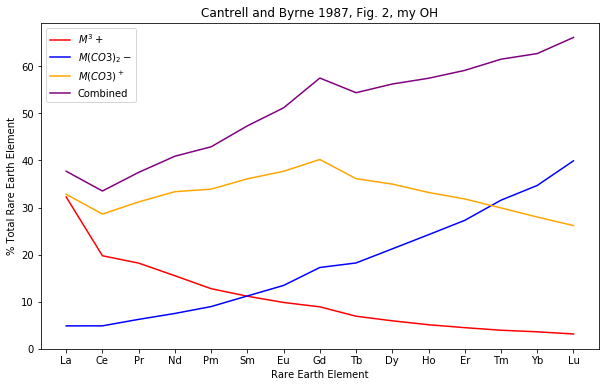

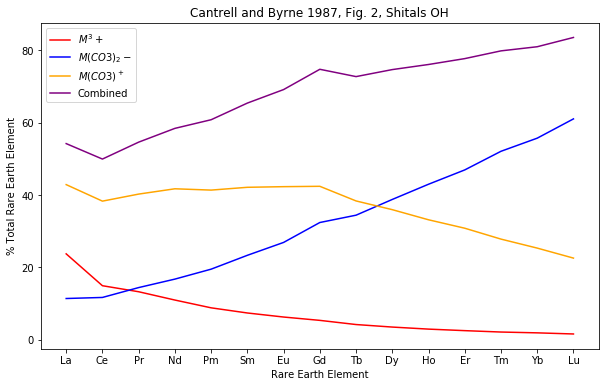

In [3]:
## Cantrell and Byrne 1987
#
# Tc = 25
# S = 35.1
# Total [CO3^2-] = 1.39 x 10^-4 moles/Kg
# I = 19.924*S/(1000-1.005*S)
#  mT_cat   (mol/kg) : Total concentration  of major cations in seawater (Na, K, Mg, Ca, Sr)
#  mT_an    (mol\kg) : Total concentration  of major anions in seawater  (Cl, SO4, CO3, HCO3, Br, F, B(OH)4)
#  OH       (mol\kg) : Total concentration  of OH anion in seawater
pH     = 8.2
Tc     = 25
S      = 35.1
I      = ((19.924*S)/(1000-(1.005*S)))
mT_cat = [0.4689674, 0.0102077, 0.0528171, 0.0102821, 0.0000907]
mT_an  = [0.5458696, 0.0282352, 0.000139, 0.00179143, 0.0008421, 0.0000683, 0.0001008]
OH     = 10**(-14+pH)

### Using my pH

mjcat_spec, mjcat_FREE, mjan_spec, mjan_FREE, mncat_spec, mncat_FREE, div_spec, div_FREE, triv_spec, triv_FREE = speciation(Tc, I, mT_cat, mT_an, OH)

# Line1, M^3+ = La3+, Ce3+, Pr3+, Nd3+, Pm3+, Sm3+, Eu3+, Gd3+, Tb3+, Dy3+, Ho3+, Er3+, Tm3+, Yb3+, Lu3+ 
# Line2, M(CO3)2- = La(CO3)2-, Ce(CO3)2-, Pr(CO3)2-, Nd(CO3)2-, Pm(CO3)2-, Sm(CO3)2-, Eu(CO3)2-, Gd(CO3)2-, Tb(CO3)2-, Dy(CO3)2-, Ho(CO3)2-, Er(CO3)2-, Tm(CO3)2-, Yb(CO3)2-, Lu(CO3)2-
# Line3, MCO3+ = LaCO3+, CeCO3+, PrCO3+, NdCO3+, PmCO3+, SmCO3+, EuCO3+, GdCO3+, TbCO3+, DyCO3+, HoCO3+, ErCO3+, TmCO3+, YbCO3+, LuCO3+
# Line4, (MCO3+) + (M(CO3)2-) = La, Ce, Pr, Nd, Pm, Sm, Eu, Gd, Tb, Dy, Ho, Er, Tm, Yb, Lu

Line1 = triv_FREE[0][:15]
Line2 = [triv_spec[1,0,2], triv_spec[1,1,2], triv_spec[1,2,2], triv_spec[1,3,2], triv_spec[1,4,2], triv_spec[1,5,2], triv_spec[1,6,2], triv_spec[1,7,2], triv_spec[1,8,2], triv_spec[1,9,2], triv_spec[1,10,2], triv_spec[1,11,2], triv_spec[1,12,2], triv_spec[1,13,2], triv_spec[1,14,2]]
Line3 = [triv_spec[0,0,2], triv_spec[0,1,2], triv_spec[0,2,2], triv_spec[0,3,2], triv_spec[0,4,2], triv_spec[0,5,2], triv_spec[0,6,2], triv_spec[0,7,2], triv_spec[0,8,2], triv_spec[0,9,2], triv_spec[0,10,2], triv_spec[0,11,2], triv_spec[0,12,2], triv_spec[0,13,2], triv_spec[0,14,2]]
Line4 = [(Line2[0]+Line3[0]), (Line2[1]+Line3[1]), (Line2[2]+Line3[2]), (Line2[3]+Line3[3]), (Line2[4]+Line3[4]), (Line2[5]+Line3[5]), (Line2[6]+Line3[6]), (Line2[7]+Line3[7]), (Line2[8]+Line3[8]), (Line2[9]+Line3[9]), (Line2[10]+Line3[10]), (Line2[11]+Line3[11]), (Line2[12]+Line3[12]), (Line2[13]+Line3[13]), (Line2[14]+Line3[14])]

mult_Line2 = [element * 100 for element in Line2]
mult_Line3 = [element * 100 for element in Line3]
mult_Line4 = [element * 100 for element in Line4]

figure(figsize=(10,6))

REE = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'])

plot(REE, Line1, color="red", linewidth=1.5, linestyle="-", label="$M^3+$")
plot(REE, mult_Line2, color="blue", linewidth=1.5, linestyle="-", label="$M(CO3)_2-$")
plot(REE, mult_Line3, color="orange", linewidth=1.5, linestyle="-", label="$M(CO3)^+$")
plot(REE, mult_Line4, color="purple", linewidth=1.5, linestyle="-", label="Combined")
xlabel('Rare Earth Element')
ylabel('% Total Rare Earth Element')
title('Cantrell and Byrne 1987, Fig. 2, my OH')
legend()
show()

### Using Shitals pH of 5.11

mT_an1 = [0.5458696, 0.0282352, 0.00024694, 0.00179143, 0.0008421, 0.0000683, 0.0001008]
OH1    = 7.75506018018797e-06

mjcat_spec1, mjcat_FREE1, mjan_spec1, mjan_FREE1, mncat_spec1, mncat_FREE1, div_spec1, div_FREE1, triv_spec1, triv_FREE1 = speciation(Tc, I, mT_cat, mT_an1, OH1)

# Line1, M^3+ = La3+, Ce3+, Pr3+, Nd3+, Pm3+, Sm3+, Eu3+, Gd3+, Tb3+, Dy3+, Ho3+, Er3+, Tm3+, Yb3+, Lu3+ 
# Line2, M(CO3)2- = La(CO3)2-, Ce(CO3)2-, Pr(CO3)2-, Nd(CO3)2-, Pm(CO3)2-, Sm(CO3)2-, Eu(CO3)2-, Gd(CO3)2-, Tb(CO3)2-, Dy(CO3)2-, Ho(CO3)2-, Er(CO3)2-, Tm(CO3)2-, Yb(CO3)2-, Lu(CO3)2-
# Line3, MCO3+ = LaCO3+, CeCO3+, PrCO3+, NdCO3+, PmCO3+, SmCO3+, EuCO3+, GdCO3+, TbCO3+, DyCO3+, HoCO3+, ErCO3+, TmCO3+, YbCO3+, LuCO3+
# Line4, (MCO3+) + (M(CO3)2-) = La, Ce, Pr, Nd, Pm, Sm, Eu, Gd, Tb, Dy, Ho, Er, Tm, Yb, Lu

Line1_1 = triv_FREE1[0][:15]
Line2_1 = [triv_spec1[1,0,2], triv_spec1[1,1,2], triv_spec1[1,2,2], triv_spec1[1,3,2], triv_spec1[1,4,2], triv_spec1[1,5,2], triv_spec1[1,6,2], triv_spec1[1,7,2], triv_spec1[1,8,2], triv_spec1[1,9,2], triv_spec1[1,10,2], triv_spec1[1,11,2], triv_spec1[1,12,2], triv_spec1[1,13,2], triv_spec1[1,14,2]]
Line3_1 = [triv_spec1[0,0,2], triv_spec1[0,1,2], triv_spec1[0,2,2], triv_spec1[0,3,2], triv_spec1[0,4,2], triv_spec1[0,5,2], triv_spec1[0,6,2], triv_spec1[0,7,2], triv_spec1[0,8,2], triv_spec1[0,9,2], triv_spec1[0,10,2], triv_spec1[0,11,2], triv_spec1[0,12,2], triv_spec1[0,13,2], triv_spec1[0,14,2]]
Line4_1 = [(Line2_1[0]+Line3_1[0]), (Line2_1[1]+Line3_1[1]), (Line2_1[2]+Line3_1[2]), (Line2_1[3]+Line3_1[3]), (Line2_1[4]+Line3_1[4]), (Line2_1[5]+Line3_1[5]), (Line2_1[6]+Line3_1[6]), (Line2_1[7]+Line3_1[7]), (Line2_1[8]+Line3_1[8]), (Line2_1[9]+Line3_1[9]), (Line2_1[10]+Line3_1[10]), (Line2_1[11]+Line3_1[11]), (Line2_1[12]+Line3_1[12]), (Line2_1[13]+Line3_1[13]), (Line2_1[14]+Line3_1[14])]

mult_Line2_1 = [element * 100 for element in Line2_1]
mult_Line3_1 = [element * 100 for element in Line3_1]
mult_Line4_1 = [element * 100 for element in Line4_1]

figure(figsize=(10,6))

REE = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'])

plot(REE, Line1_1, color="red", linewidth=1.5, linestyle="-", label="$M^3+$")
plot(REE, mult_Line2_1, color="blue", linewidth=1.5, linestyle="-", label="$M(CO3)_2-$")
plot(REE, mult_Line3_1, color="orange", linewidth=1.5, linestyle="-", label="$M(CO3)^+$")
plot(REE, mult_Line4_1, color="purple", linewidth=1.5, linestyle="-", label="Combined")
xlabel('Rare Earth Element')
ylabel('% Total Rare Earth Element')
title('Cantrell and Byrne 1987, Fig. 2, Shitals OH')
legend()
show()

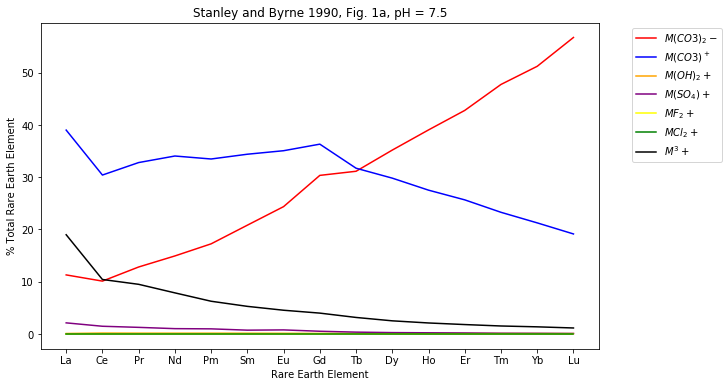

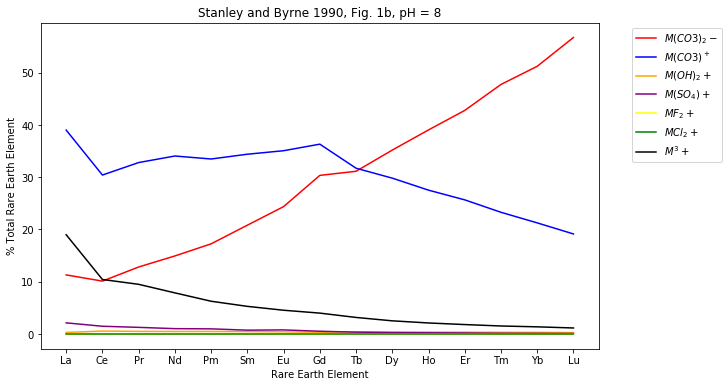

In [4]:
## Stanley and Byrne 1990
#
# Tc = 20
# S = 35.345
# I = 19.924*S/(1000-1.005*S)
#  mT_cat   (mol/kg) : Total concentration  of major cations in seawater (Na, K, Mg, Ca, Sr)
#  mT_an    (mol\kg) : Total concentration  of major anions in seawater  (Cl, SO4, CO3, HCO3, Br, F, B(OH)4). Dont include CO3 and HCO3 as they are outputs
#  OH       (mol\kg) : Total concentration  of OH anion in seawater
pH1     = 7.5
pH2     = 8
Tc      = 20
S       = 35
I       = ((19.924*S)/(1000-(1.005*S)))
mT_cat  = [0.4689674, 0.0102077, 0.0528171, 0.0102821, 0.0000907]
mT_an   = [0.5458696, 0.0282352, 0.00024694, 0.00179143, 0.0008421, 0.0000683, 0.0001008]
OH1     = 10**(-14+pH1)
OH2     = 10**(-14+pH2)

mjcat_spec1, mjcat_FREE1, mjan_spec1, mjan_FREE1, mncat_spec1, mncat_FREE1, div_spec1, div_FREE1, triv_spec1, triv_FREE1 = speciation(Tc, I, mT_cat, mT_an, OH1)
mjcat_spec2, mjcat_FREE2, mjan_spec2, mjan_FREE2, mncat_spec2, mncat_FREE2, div_spec2, div_FREE2, triv_spec2, triv_FREE2 = speciation(Tc, I, mT_cat, [0.5458696, 0.0282352, 0.00024694, 0.00179143, 0.0008421, 0.0000683, 0.0001008], OH2)

# Line1, M(CO3)2- = La(CO3)2-, Ce(CO3)2-, Pr(CO3)2-, Nd(CO3)2-, Pm(CO3)2-, Sm(CO3)2-, Eu(CO3)2-, Gd(CO3)2-, Tb(CO3)2-, Dy(CO3)2-, Ho(CO3)2-, Er(CO3)2-, Tm(CO3)2-, Yb(CO3)2-, Lu(CO3)2- 
# Line2, MCO3+ = LaCO3+, CeCO3+, PrCO3+, NdCO3+, PmCO3+, SmCO3+, EuCO3+, GdCO3+, TbCO3+, DyCO3+, HoCO3+, ErCO3+, TmCO3+, YbCO3+, LuCO3+
# Line3, MOH2+ = LaOH2+, CeOH2+, PrOH2+, NdOH2+, PmOH2+, SmOH2+, EuOH2+, GdOH+, TbOH2+, DyOH2+, HoOH2+, ErOH2+, TmOH2+, YbOH2+, LuOH2+
# Line4, M(SO4)+ = La(SO4)+, Ce(SO4)+, Pr(SO4)+, Nd(SO4)+, Pm(SO4)+, Sm(SO4)+, Eu(SO4)+, Gd(SO4)+, Tb(SO4)+, Dy(SO4)+, Ho(SO4)+, Er(SO4)+, Tm(SO4)+, Yb(SO4)+, Lu(SO4)+
# Line5, MF2+ = LaF2+, CeF2+, PrF2+, NdF2+, PmF2+, SmF2+, EuF2+, GdF2+, TbF2+, DyF2+, HoF2+, ErF2+, TmF2+, YbF2+, LuF2+
# Line6, MCl2+ = LaCl2+, CeCl2+, PrCl2+, NdCl2+, PmCl2+, SmCl2+, EuCl2+, GdCl2+, TbCl2+, DyCl2+, HoCl2+, ErCl2+, TmCl2+, YbCl+, LuCl2+
# Line7, M3+ = La3+, Ce3+, Pr3+, Nd3+, Pm3+, Sm3+, Eu3+, Gd3+, Tb3+, Dy3+, Ho3+, Er3+, Tm3+, Yb3+, Lu3+

#pH1
Line1_1 = [triv_spec1[1,0,2], triv_spec1[1,1,2], triv_spec1[1,2,2], triv_spec1[1,3,2], triv_spec1[1,4,2], triv_spec1[1,5,2], triv_spec1[1,6,2], triv_spec1[1,7,2], triv_spec1[1,8,2], triv_spec1[1,9,2], triv_spec1[1,10,2], triv_spec1[1,11,2], triv_spec1[1,12,2], triv_spec1[1,13,2], triv_spec1[1,14,2]]
Line2_1 = [triv_spec1[0,0,2], triv_spec1[0,1,2], triv_spec1[0,2,2], triv_spec1[0,3,2], triv_spec1[0,4,2], triv_spec1[0,5,2], triv_spec1[0,6,2], triv_spec1[0,7,2], triv_spec1[0,8,2], triv_spec1[0,9,2], triv_spec1[0,10,2], triv_spec1[0,11,2], triv_spec1[0,12,2], triv_spec1[0,13,2], triv_spec1[0,14,2]]
Line3_1 = [triv_spec1[0,0,5], triv_spec1[0,1,5], triv_spec1[0,2,5], triv_spec1[0,3,5], triv_spec1[0,4,5], triv_spec1[0,5,5], triv_spec1[0,6,5], triv_spec1[0,7,5], triv_spec1[0,8,5], triv_spec1[0,9,5], triv_spec1[0,10,5], triv_spec1[0,11,5], triv_spec1[0,12,5], triv_spec1[0,13,5], triv_spec1[0,14,5]]
Line4_1 = [triv_spec1[0,0,1], triv_spec1[0,1,1], triv_spec1[0,2,1], triv_spec1[0,3,1], triv_spec1[0,4,1], triv_spec1[0,5,1], triv_spec1[0,6,1], triv_spec1[0,7,1], triv_spec1[0,8,1], triv_spec1[0,9,1], triv_spec1[0,10,1], triv_spec1[0,11,1], triv_spec1[0,12,1], triv_spec1[0,13,1], triv_spec1[0,14,1]]
Line5_1 = [triv_spec1[1,0,4], triv_spec1[1,1,4], triv_spec1[1,2,4], triv_spec1[1,3,4], triv_spec1[1,4,4], triv_spec1[1,5,4], triv_spec1[1,6,4], triv_spec1[1,7,4], triv_spec1[1,8,4], triv_spec1[1,9,4], triv_spec1[1,10,4], triv_spec1[1,11,4], triv_spec1[1,12,4], triv_spec1[1,13,4], triv_spec1[1,14,4]]
Line6_1 = [triv_spec1[1,0,0], triv_spec1[1,1,0], triv_spec1[1,2,0], triv_spec1[1,3,0], triv_spec1[1,4,0], triv_spec1[1,5,0], triv_spec1[1,6,0], triv_spec1[1,7,0], triv_spec1[1,8,0], triv_spec1[1,9,0], triv_spec1[1,10,0], triv_spec1[1,11,0], triv_spec1[1,12,0], triv_spec1[1,13,0], triv_spec1[1,14,0]]
Line7_1 = triv_FREE1[0][:15]

mult_Line1_1 = [element * 100 for element in Line1_1]
mult_Line2_1 = [element * 100 for element in Line2_1]
mult_Line3_1 = [element * 100 for element in Line3_1]
mult_Line4_1 = [element * 100 for element in Line4_1]
mult_Line5_1 = [element * 100 for element in Line5_1]
mult_Line6_1 = [element * 100 for element in Line6_1]

#pH2
Line1_2 = [triv_spec2[1,0,2], triv_spec2[1,1,2], triv_spec2[1,2,2], triv_spec2[1,3,2], triv_spec2[1,4,2], triv_spec2[1,5,2], triv_spec2[1,6,2], triv_spec2[1,7,2], triv_spec2[1,8,2], triv_spec2[1,9,2], triv_spec2[1,10,2], triv_spec2[1,11,2], triv_spec2[1,12,2], triv_spec2[1,13,2], triv_spec2[1,14,2]]
Line2_2 = [triv_spec2[0,0,2], triv_spec2[0,1,2], triv_spec2[0,2,2], triv_spec2[0,3,2], triv_spec2[0,4,2], triv_spec2[0,5,2], triv_spec2[0,6,2], triv_spec2[0,7,2], triv_spec2[0,8,2], triv_spec2[0,9,2], triv_spec2[0,10,2], triv_spec2[0,11,2], triv_spec2[0,12,2], triv_spec2[0,13,2], triv_spec2[0,14,2]]
Line3_2 = [triv_spec2[0,0,5], triv_spec2[0,1,5], triv_spec2[0,2,5], triv_spec2[0,3,5], triv_spec2[0,4,5], triv_spec2[0,5,5], triv_spec2[0,6,5], triv_spec2[0,7,5], triv_spec2[0,8,5], triv_spec2[0,9,5], triv_spec2[0,10,5], triv_spec2[0,11,5], triv_spec2[0,12,5], triv_spec2[0,13,5], triv_spec2[0,14,5]]
Line4_2 = [triv_spec2[0,0,1], triv_spec2[0,1,1], triv_spec2[0,2,1], triv_spec2[0,3,1], triv_spec2[0,4,1], triv_spec2[0,5,1], triv_spec2[0,6,1], triv_spec2[0,7,1], triv_spec2[0,8,1], triv_spec2[0,9,1], triv_spec2[0,10,1], triv_spec2[0,11,1], triv_spec2[0,12,1], triv_spec2[0,13,1], triv_spec2[0,14,1]]
Line5_2 = [triv_spec2[1,0,4], triv_spec2[1,1,4], triv_spec2[1,2,4], triv_spec2[1,3,4], triv_spec2[1,4,4], triv_spec2[1,5,4], triv_spec2[1,6,4], triv_spec2[1,7,4], triv_spec2[1,8,4], triv_spec2[1,9,4], triv_spec2[1,10,4], triv_spec2[1,11,4], triv_spec2[1,12,4], triv_spec2[1,13,4], triv_spec2[1,14,4]]
Line6_2 = [triv_spec2[1,0,0], triv_spec2[1,1,0], triv_spec2[1,2,0], triv_spec2[1,3,0], triv_spec2[1,4,0], triv_spec2[1,5,0], triv_spec2[1,6,0], triv_spec2[1,7,0], triv_spec2[1,8,0], triv_spec2[1,9,0], triv_spec2[1,10,0], triv_spec2[1,11,0], triv_spec2[1,12,0], triv_spec2[1,13,0], triv_spec2[1,14,0]]
Line7_2 = triv_FREE2[0][:15]

mult_Line1_2 = [element * 100 for element in Line1_2]
mult_Line2_2 = [element * 100 for element in Line2_2]
mult_Line3_2 = [element * 100 for element in Line3_2]
mult_Line4_2 = [element * 100 for element in Line4_2]
mult_Line5_2 = [element * 100 for element in Line5_2]
mult_Line6_2 = [element * 100 for element in Line6_2]

#Graph of pH1
figure(figsize=(10,6))

REE = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'])

plot(REE, mult_Line1_1, color="red", linewidth=1.5, linestyle="-", label="$M(CO3)_2-$")
plot(REE, mult_Line2_1, color="blue", linewidth=1.5, linestyle="-", label="$M(CO3)^+$")
plot(REE, mult_Line3_1, color="orange", linewidth=1.5, linestyle="-", label="$M(OH)_2+$")
plot(REE, mult_Line4_1, color="purple", linewidth=1.5, linestyle="-", label="$M(SO_4)+$")
plot(REE, mult_Line5_1, color="yellow", linewidth=1.5, linestyle="-", label="$MF_2+$")
plot(REE, mult_Line6_1, color="green", linewidth=1.5, linestyle="-", label="$MCl_2+$")
plot(REE, Line7_1, color="black", linewidth=1.5, linestyle="-", label="$M^3+$")
xlabel('Rare Earth Element')
ylabel('% Total Rare Earth Element')
title('Stanley and Byrne 1990, Fig. 1a, pH = 7.5')
legend(bbox_to_anchor=(1.05, 1), loc='upper left')
show()

#Graph of pH2
figure(figsize=(10,6))

REE = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'])

plot(REE, mult_Line1_2, color="red", linewidth=1.5, linestyle="-", label="$M(CO3)_2-$")
plot(REE, mult_Line2_2, color="blue", linewidth=1.5, linestyle="-", label="$M(CO3)^+$")
plot(REE, mult_Line3_2, color="orange", linewidth=1.5, linestyle="-", label="$M(OH)_2+$")
plot(REE, mult_Line4_2, color="purple", linewidth=1.5, linestyle="-", label="$M(SO_4)+$")
plot(REE, mult_Line5_2, color="yellow", linewidth=1.5, linestyle="-", label="$MF_2+$")
plot(REE, mult_Line6_2, color="green", linewidth=1.5, linestyle="-", label="$MCl_2+$")
plot(REE, Line7_2, color="black", linewidth=1.5, linestyle="-", label="$M^3+$")
xlabel('Rare Earth Element')
ylabel('% Total Rare Earth Element')
title('Stanley and Byrne 1990, Fig. 1b, pH = 8')
legend(bbox_to_anchor=(1.05, 1), loc='upper left')
show()

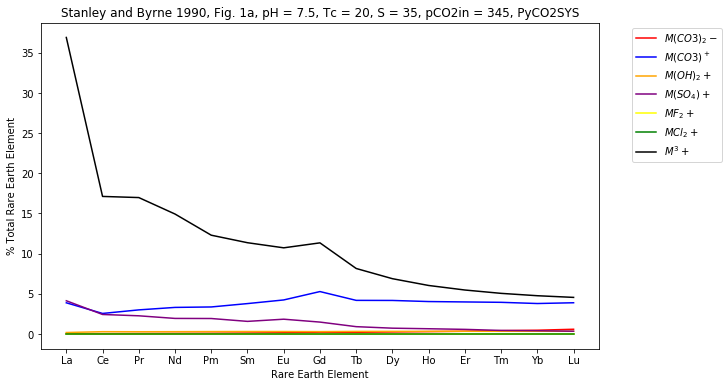

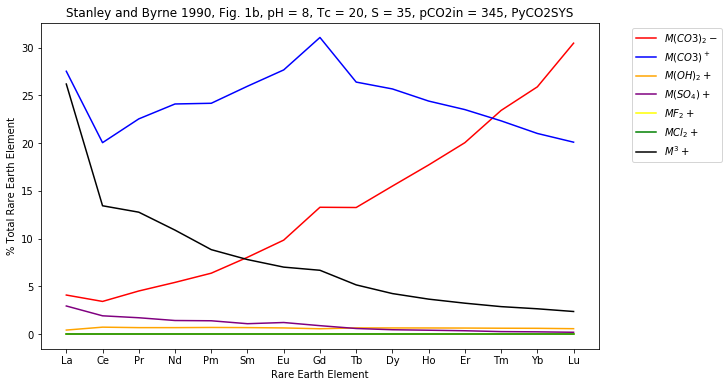

In [5]:
## Using PyCO2SYS to get HCO3 and CO3
#
#pH1     = 7.5
#Tc      = 20
#HCO3out = 447.51124855 (μmol/kg)
#CO3out  = 12.63370682   (μmol/kg)
#
#pH2     = 8
#Tc      = 20
#HCO3out = 1415.15482396 (μmol/kg)
#CO3out  = 126.33706817  (μmol/kg)

## Stanley and Byrne 1990
#
# Tc = 20
# S = 35.345
# I = 19.924*S/(1000-1.005*S)
# mT_cat   (mol/kg) : Total concentration  of major cations in seawater (Na, K, Mg, Ca, Sr)
# mT_an    (mol/kg) : Total concentration  of major anions in seawater  (Cl, SO4, CO3, HCO3, Br, F, B(OH)4). Dont include CO3 and HCO3 as they are outputs
# OH       (mol/kg) : Total concentration  of OH anion in seawater
pH1     = 7.5
pH2     = 8
Tc      = 20
S       = 35
I       = ((19.924*S)/(1000-(1.005*S)))
mT_cat  = [0.4689674, 0.0102077, 0.0528171, 0.0102821, 0.0000907]
mT_an1  = [0.5458696, 0.0282352, (12.63370682*10**-6), (447.51124855*10**-6), 0.0008421, 0.0000683, 0.0001008]
mT_an2  = [0.5458696, 0.0282352, (126.33706817*10**-6), (1415.15482396*10**-6), 0.0008421, 0.0000683, 0.0001008]
OH1     = 10**(-14+pH1)
OH2     = 10**(-14+pH2)

mjcat_spec1, mjcat_FREE1, mjan_spec1, mjan_FREE1, mncat_spec1, mncat_FREE1, div_spec1, div_FREE1, triv_spec1, triv_FREE1 = speciation(Tc, I, mT_cat, mT_an1, OH1)
mjcat_spec2, mjcat_FREE2, mjan_spec2, mjan_FREE2, mncat_spec2, mncat_FREE2, div_spec2, div_FREE2, triv_spec2, triv_FREE2 = speciation(Tc, I, mT_cat, mT_an2, OH2)

# Line1, M(CO3)2- = La(CO3)2-, Ce(CO3)2-, Pr(CO3)2-, Nd(CO3)2-, Pm(CO3)2-, Sm(CO3)2-, Eu(CO3)2-, Gd(CO3)2-, Tb(CO3)2-, Dy(CO3)2-, Ho(CO3)2-, Er(CO3)2-, Tm(CO3)2-, Yb(CO3)2-, Lu(CO3)2- 
# Line2, MCO3+ = LaCO3+, CeCO3+, PrCO3+, NdCO3+, PmCO3+, SmCO3+, EuCO3+, GdCO3+, TbCO3+, DyCO3+, HoCO3+, ErCO3+, TmCO3+, YbCO3+, LuCO3+
# Line3, MOH2+ = LaOH2+, CeOH2+, PrOH2+, NdOH2+, PmOH2+, SmOH2+, EuOH2+, GdOH+, TbOH2+, DyOH2+, HoOH2+, ErOH2+, TmOH2+, YbOH2+, LuOH2+
# Line4, M(SO4)+ = La(SO4)+, Ce(SO4)+, Pr(SO4)+, Nd(SO4)+, Pm(SO4)+, Sm(SO4)+, Eu(SO4)+, Gd(SO4)+, Tb(SO4)+, Dy(SO4)+, Ho(SO4)+, Er(SO4)+, Tm(SO4)+, Yb(SO4)+, Lu(SO4)+
# Line5, MF2+ = LaF2+, CeF2+, PrF2+, NdF2+, PmF2+, SmF2+, EuF2+, GdF2+, TbF2+, DyF2+, HoF2+, ErF2+, TmF2+, YbF2+, LuF2+
# Line6, MCl2+ = LaCl2+, CeCl2+, PrCl2+, NdCl2+, PmCl2+, SmCl2+, EuCl2+, GdCl2+, TbCl2+, DyCl2+, HoCl2+, ErCl2+, TmCl2+, YbCl+, LuCl2+
# Line7, M3+ = La3+, Ce3+, Pr3+, Nd3+, Pm3+, Sm3+, Eu3+, Gd3+, Tb3+, Dy3+, Ho3+, Er3+, Tm3+, Yb3+, Lu3+

#pH1
Line1_1 = [triv_spec1[1,0,2], triv_spec1[1,1,2], triv_spec1[1,2,2], triv_spec1[1,3,2], triv_spec1[1,4,2], triv_spec1[1,5,2], triv_spec1[1,6,2], triv_spec1[1,7,2], triv_spec1[1,8,2], triv_spec1[1,9,2], triv_spec1[1,10,2], triv_spec1[1,11,2], triv_spec1[1,12,2], triv_spec1[1,13,2], triv_spec1[1,14,2]]
Line2_1 = [triv_spec1[0,0,2], triv_spec1[0,1,2], triv_spec1[0,2,2], triv_spec1[0,3,2], triv_spec1[0,4,2], triv_spec1[0,5,2], triv_spec1[0,6,2], triv_spec1[0,7,2], triv_spec1[0,8,2], triv_spec1[0,9,2], triv_spec1[0,10,2], triv_spec1[0,11,2], triv_spec1[0,12,2], triv_spec1[0,13,2], triv_spec1[0,14,2]]
Line3_1 = [triv_spec1[0,0,5], triv_spec1[0,1,5], triv_spec1[0,2,5], triv_spec1[0,3,5], triv_spec1[0,4,5], triv_spec1[0,5,5], triv_spec1[0,6,5], triv_spec1[0,7,5], triv_spec1[0,8,5], triv_spec1[0,9,5], triv_spec1[0,10,5], triv_spec1[0,11,5], triv_spec1[0,12,5], triv_spec1[0,13,5], triv_spec1[0,14,5]]
Line4_1 = [triv_spec1[0,0,1], triv_spec1[0,1,1], triv_spec1[0,2,1], triv_spec1[0,3,1], triv_spec1[0,4,1], triv_spec1[0,5,1], triv_spec1[0,6,1], triv_spec1[0,7,1], triv_spec1[0,8,1], triv_spec1[0,9,1], triv_spec1[0,10,1], triv_spec1[0,11,1], triv_spec1[0,12,1], triv_spec1[0,13,1], triv_spec1[0,14,1]]
Line5_1 = [triv_spec1[1,0,4], triv_spec1[1,1,4], triv_spec1[1,2,4], triv_spec1[1,3,4], triv_spec1[1,4,4], triv_spec1[1,5,4], triv_spec1[1,6,4], triv_spec1[1,7,4], triv_spec1[1,8,4], triv_spec1[1,9,4], triv_spec1[1,10,4], triv_spec1[1,11,4], triv_spec1[1,12,4], triv_spec1[1,13,4], triv_spec1[1,14,4]]
Line6_1 = [triv_spec1[1,0,0], triv_spec1[1,1,0], triv_spec1[1,2,0], triv_spec1[1,3,0], triv_spec1[1,4,0], triv_spec1[1,5,0], triv_spec1[1,6,0], triv_spec1[1,7,0], triv_spec1[1,8,0], triv_spec1[1,9,0], triv_spec1[1,10,0], triv_spec1[1,11,0], triv_spec1[1,12,0], triv_spec1[1,13,0], triv_spec1[1,14,0]]
Line7_1 = triv_FREE1[0][:15]

mult_Line1_1 = [element * 100 for element in Line1_1]
mult_Line2_1 = [element * 100 for element in Line2_1]
mult_Line3_1 = [element * 100 for element in Line3_1]
mult_Line4_1 = [element * 100 for element in Line4_1]
mult_Line5_1 = [element * 100 for element in Line5_1]
mult_Line6_1 = [element * 100 for element in Line6_1]

#pH2
Line1_2 = [triv_spec2[1,0,2], triv_spec2[1,1,2], triv_spec2[1,2,2], triv_spec2[1,3,2], triv_spec2[1,4,2], triv_spec2[1,5,2], triv_spec2[1,6,2], triv_spec2[1,7,2], triv_spec2[1,8,2], triv_spec2[1,9,2], triv_spec2[1,10,2], triv_spec2[1,11,2], triv_spec2[1,12,2], triv_spec2[1,13,2], triv_spec2[1,14,2]]
Line2_2 = [triv_spec2[0,0,2], triv_spec2[0,1,2], triv_spec2[0,2,2], triv_spec2[0,3,2], triv_spec2[0,4,2], triv_spec2[0,5,2], triv_spec2[0,6,2], triv_spec2[0,7,2], triv_spec2[0,8,2], triv_spec2[0,9,2], triv_spec2[0,10,2], triv_spec2[0,11,2], triv_spec2[0,12,2], triv_spec2[0,13,2], triv_spec2[0,14,2]]
Line3_2 = [triv_spec2[0,0,5], triv_spec2[0,1,5], triv_spec2[0,2,5], triv_spec2[0,3,5], triv_spec2[0,4,5], triv_spec2[0,5,5], triv_spec2[0,6,5], triv_spec2[0,7,5], triv_spec2[0,8,5], triv_spec2[0,9,5], triv_spec2[0,10,5], triv_spec2[0,11,5], triv_spec2[0,12,5], triv_spec2[0,13,5], triv_spec2[0,14,5]]
Line4_2 = [triv_spec2[0,0,1], triv_spec2[0,1,1], triv_spec2[0,2,1], triv_spec2[0,3,1], triv_spec2[0,4,1], triv_spec2[0,5,1], triv_spec2[0,6,1], triv_spec2[0,7,1], triv_spec2[0,8,1], triv_spec2[0,9,1], triv_spec2[0,10,1], triv_spec2[0,11,1], triv_spec2[0,12,1], triv_spec2[0,13,1], triv_spec2[0,14,1]]
Line5_2 = [triv_spec2[1,0,4], triv_spec2[1,1,4], triv_spec2[1,2,4], triv_spec2[1,3,4], triv_spec2[1,4,4], triv_spec2[1,5,4], triv_spec2[1,6,4], triv_spec2[1,7,4], triv_spec2[1,8,4], triv_spec2[1,9,4], triv_spec2[1,10,4], triv_spec2[1,11,4], triv_spec2[1,12,4], triv_spec2[1,13,4], triv_spec2[1,14,4]]
Line6_2 = [triv_spec2[1,0,0], triv_spec2[1,1,0], triv_spec2[1,2,0], triv_spec2[1,3,0], triv_spec2[1,4,0], triv_spec2[1,5,0], triv_spec2[1,6,0], triv_spec2[1,7,0], triv_spec2[1,8,0], triv_spec2[1,9,0], triv_spec2[1,10,0], triv_spec2[1,11,0], triv_spec2[1,12,0], triv_spec2[1,13,0], triv_spec2[1,14,0]]
Line7_2 = triv_FREE2[0][:15]

mult_Line1_2 = [element * 100 for element in Line1_2]
mult_Line2_2 = [element * 100 for element in Line2_2]
mult_Line3_2 = [element * 100 for element in Line3_2]
mult_Line4_2 = [element * 100 for element in Line4_2]
mult_Line5_2 = [element * 100 for element in Line5_2]
mult_Line6_2 = [element * 100 for element in Line6_2]

#Graph of pH1
figure(figsize=(10,6))

REE = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'])

plot(REE, mult_Line1_1, color="red", linewidth=1.5, linestyle="-", label="$M(CO3)_2-$")
plot(REE, mult_Line2_1, color="blue", linewidth=1.5, linestyle="-", label="$M(CO3)^+$")
plot(REE, mult_Line3_1, color="orange", linewidth=1.5, linestyle="-", label="$M(OH)_2+$")
plot(REE, mult_Line4_1, color="purple", linewidth=1.5, linestyle="-", label="$M(SO_4)+$")
plot(REE, mult_Line5_1, color="yellow", linewidth=1.5, linestyle="-", label="$MF_2+$")
plot(REE, mult_Line6_1, color="green", linewidth=1.5, linestyle="-", label="$MCl_2+$")
plot(REE, Line7_1, color="black", linewidth=1.5, linestyle="-", label="$M^3+$")
xlabel('Rare Earth Element')
ylabel('% Total Rare Earth Element')
title('Stanley and Byrne 1990, Fig. 1a, pH = 7.5, Tc = 20, S = 35, pCO2in = 345, PyCO2SYS')
legend(bbox_to_anchor=(1.05, 1), loc='upper left')
show()

#Graph of pH2
figure(figsize=(10,6))

REE = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'])

plot(REE, mult_Line1_2, color="red", linewidth=1.5, linestyle="-", label="$M(CO3)_2-$")
plot(REE, mult_Line2_2, color="blue", linewidth=1.5, linestyle="-", label="$M(CO3)^+$")
plot(REE, mult_Line3_2, color="orange", linewidth=1.5, linestyle="-", label="$M(OH)_2+$")
plot(REE, mult_Line4_2, color="purple", linewidth=1.5, linestyle="-", label="$M(SO_4)+$")
plot(REE, mult_Line5_2, color="yellow", linewidth=1.5, linestyle="-", label="$MF_2+$")
plot(REE, mult_Line6_2, color="green", linewidth=1.5, linestyle="-", label="$MCl_2+$")
plot(REE, Line7_2, color="black", linewidth=1.5, linestyle="-", label="$M^3+$")
xlabel('Rare Earth Element')
ylabel('% Total Rare Earth Element')
title('Stanley and Byrne 1990, Fig. 1b, pH = 8, Tc = 20, S = 35, pCO2in = 345, PyCO2SYS')
legend(bbox_to_anchor=(1.05, 1), loc='upper left')
show()

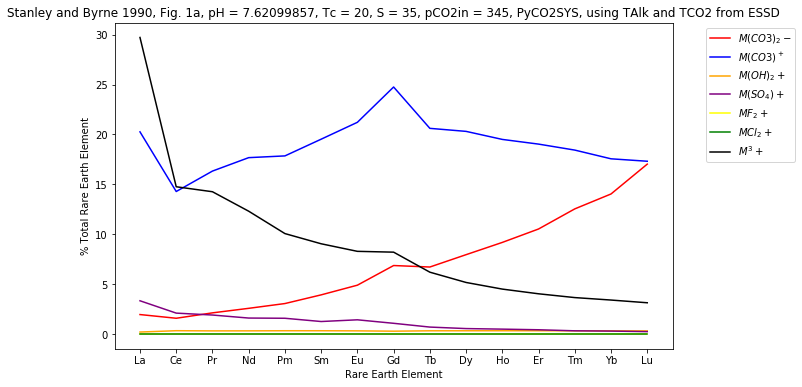

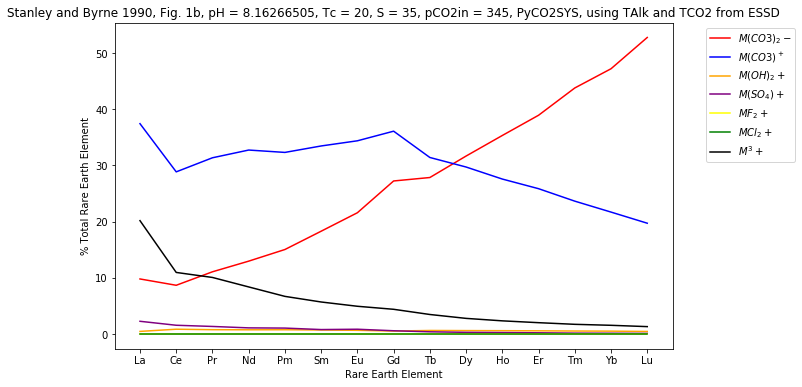

In [6]:
## Using PyCO2SYS to get HCO3 and CO3 from TAlk and TCO2 from ESSD Fig 3 and 4
#
#pH1     = 7.62099857
#Tc      = 20
#HCO3out = 2196.6660337  (μmol/kg)
#CO3out  = 81.93877124   (μmol/kg)
#TAlk    = 2400          (μmol/kg)
#TCO2    = 2320          (μmol/kg)

#pH2     = 8.16266505
#Tc      = 20
#HCO3out = 1717.68477385 (μmol/kg)
#CO3out  = 223.01565565  (μmol/kg)
#TAlk    = 2275          (μmol/kg)
#TCO2    = 1950          (μmol/kg)

## Stanley and Byrne 1990
#
# Tc = 20
# S = 35.345
# I = 19.924*S/(1000-1.005*S)
# mT_cat   (mol/kg) : Total concentration  of major cations in seawater (Na, K, Mg, Ca, Sr)
# mT_an    (mol/kg) : Total concentration  of major anions in seawater  (Cl, SO4, CO3, HCO3, Br, F, B(OH)4). Dont include CO3 and HCO3 as they are outputs
# OH       (mol/kg) : Total concentration  of OH anion in seawater
pH1     = 7.62099857
pH2     = 8.16266505
Tc      = 20
S       = 35
I       = ((19.924*S)/(1000-(1.005*S)))
mT_cat  = [0.4689674, 0.0102077, 0.0528171, 0.0102821, 0.0000907]
mT_an1  = [0.5458696, 0.0282352, (81.93877124*10**-6), (2196.6660337*10**-6), 0.0008421, 0.0000683, 0.0001008]
mT_an2  = [0.5458696, 0.0282352, (223.01565565*10**-6), (1717.68477385*10**-6), 0.0008421, 0.0000683, 0.0001008]
OH1     = 10**(-14+pH1)
OH2     = 10**(-14+pH2)

mjcat_spec1, mjcat_FREE1, mjan_spec1, mjan_FREE1, mncat_spec1, mncat_FREE1, div_spec1, div_FREE1, triv_spec1, triv_FREE1 = speciation(Tc, I, mT_cat, mT_an1, OH1)
mjcat_spec2, mjcat_FREE2, mjan_spec2, mjan_FREE2, mncat_spec2, mncat_FREE2, div_spec2, div_FREE2, triv_spec2, triv_FREE2 = speciation(Tc, I, mT_cat, mT_an2, OH2)

# Line1, M(CO3)2- = La(CO3)2-, Ce(CO3)2-, Pr(CO3)2-, Nd(CO3)2-, Pm(CO3)2-, Sm(CO3)2-, Eu(CO3)2-, Gd(CO3)2-, Tb(CO3)2-, Dy(CO3)2-, Ho(CO3)2-, Er(CO3)2-, Tm(CO3)2-, Yb(CO3)2-, Lu(CO3)2- 
# Line2, MCO3+ = LaCO3+, CeCO3+, PrCO3+, NdCO3+, PmCO3+, SmCO3+, EuCO3+, GdCO3+, TbCO3+, DyCO3+, HoCO3+, ErCO3+, TmCO3+, YbCO3+, LuCO3+
# Line3, MOH2+ = LaOH2+, CeOH2+, PrOH2+, NdOH2+, PmOH2+, SmOH2+, EuOH2+, GdOH+, TbOH2+, DyOH2+, HoOH2+, ErOH2+, TmOH2+, YbOH2+, LuOH2+
# Line4, M(SO4)+ = La(SO4)+, Ce(SO4)+, Pr(SO4)+, Nd(SO4)+, Pm(SO4)+, Sm(SO4)+, Eu(SO4)+, Gd(SO4)+, Tb(SO4)+, Dy(SO4)+, Ho(SO4)+, Er(SO4)+, Tm(SO4)+, Yb(SO4)+, Lu(SO4)+
# Line5, MF2+ = LaF2+, CeF2+, PrF2+, NdF2+, PmF2+, SmF2+, EuF2+, GdF2+, TbF2+, DyF2+, HoF2+, ErF2+, TmF2+, YbF2+, LuF2+
# Line6, MCl2+ = LaCl2+, CeCl2+, PrCl2+, NdCl2+, PmCl2+, SmCl2+, EuCl2+, GdCl2+, TbCl2+, DyCl2+, HoCl2+, ErCl2+, TmCl2+, YbCl+, LuCl2+
# Line7, M3+ = La3+, Ce3+, Pr3+, Nd3+, Pm3+, Sm3+, Eu3+, Gd3+, Tb3+, Dy3+, Ho3+, Er3+, Tm3+, Yb3+, Lu3+

#pH1
Line1_1 = [triv_spec1[1,0,2], triv_spec1[1,1,2], triv_spec1[1,2,2], triv_spec1[1,3,2], triv_spec1[1,4,2], triv_spec1[1,5,2], triv_spec1[1,6,2], triv_spec1[1,7,2], triv_spec1[1,8,2], triv_spec1[1,9,2], triv_spec1[1,10,2], triv_spec1[1,11,2], triv_spec1[1,12,2], triv_spec1[1,13,2], triv_spec1[1,14,2]]
Line2_1 = [triv_spec1[0,0,2], triv_spec1[0,1,2], triv_spec1[0,2,2], triv_spec1[0,3,2], triv_spec1[0,4,2], triv_spec1[0,5,2], triv_spec1[0,6,2], triv_spec1[0,7,2], triv_spec1[0,8,2], triv_spec1[0,9,2], triv_spec1[0,10,2], triv_spec1[0,11,2], triv_spec1[0,12,2], triv_spec1[0,13,2], triv_spec1[0,14,2]]
Line3_1 = [triv_spec1[0,0,5], triv_spec1[0,1,5], triv_spec1[0,2,5], triv_spec1[0,3,5], triv_spec1[0,4,5], triv_spec1[0,5,5], triv_spec1[0,6,5], triv_spec1[0,7,5], triv_spec1[0,8,5], triv_spec1[0,9,5], triv_spec1[0,10,5], triv_spec1[0,11,5], triv_spec1[0,12,5], triv_spec1[0,13,5], triv_spec1[0,14,5]]
Line4_1 = [triv_spec1[0,0,1], triv_spec1[0,1,1], triv_spec1[0,2,1], triv_spec1[0,3,1], triv_spec1[0,4,1], triv_spec1[0,5,1], triv_spec1[0,6,1], triv_spec1[0,7,1], triv_spec1[0,8,1], triv_spec1[0,9,1], triv_spec1[0,10,1], triv_spec1[0,11,1], triv_spec1[0,12,1], triv_spec1[0,13,1], triv_spec1[0,14,1]]
Line5_1 = [triv_spec1[1,0,4], triv_spec1[1,1,4], triv_spec1[1,2,4], triv_spec1[1,3,4], triv_spec1[1,4,4], triv_spec1[1,5,4], triv_spec1[1,6,4], triv_spec1[1,7,4], triv_spec1[1,8,4], triv_spec1[1,9,4], triv_spec1[1,10,4], triv_spec1[1,11,4], triv_spec1[1,12,4], triv_spec1[1,13,4], triv_spec1[1,14,4]]
Line6_1 = [triv_spec1[1,0,0], triv_spec1[1,1,0], triv_spec1[1,2,0], triv_spec1[1,3,0], triv_spec1[1,4,0], triv_spec1[1,5,0], triv_spec1[1,6,0], triv_spec1[1,7,0], triv_spec1[1,8,0], triv_spec1[1,9,0], triv_spec1[1,10,0], triv_spec1[1,11,0], triv_spec1[1,12,0], triv_spec1[1,13,0], triv_spec1[1,14,0]]
Line7_1 = triv_FREE1[0][:15]

mult_Line1_1 = [element * 100 for element in Line1_1]
mult_Line2_1 = [element * 100 for element in Line2_1]
mult_Line3_1 = [element * 100 for element in Line3_1]
mult_Line4_1 = [element * 100 for element in Line4_1]
mult_Line5_1 = [element * 100 for element in Line5_1]
mult_Line6_1 = [element * 100 for element in Line6_1]

#pH2
Line1_2 = [triv_spec2[1,0,2], triv_spec2[1,1,2], triv_spec2[1,2,2], triv_spec2[1,3,2], triv_spec2[1,4,2], triv_spec2[1,5,2], triv_spec2[1,6,2], triv_spec2[1,7,2], triv_spec2[1,8,2], triv_spec2[1,9,2], triv_spec2[1,10,2], triv_spec2[1,11,2], triv_spec2[1,12,2], triv_spec2[1,13,2], triv_spec2[1,14,2]]
Line2_2 = [triv_spec2[0,0,2], triv_spec2[0,1,2], triv_spec2[0,2,2], triv_spec2[0,3,2], triv_spec2[0,4,2], triv_spec2[0,5,2], triv_spec2[0,6,2], triv_spec2[0,7,2], triv_spec2[0,8,2], triv_spec2[0,9,2], triv_spec2[0,10,2], triv_spec2[0,11,2], triv_spec2[0,12,2], triv_spec2[0,13,2], triv_spec2[0,14,2]]
Line3_2 = [triv_spec2[0,0,5], triv_spec2[0,1,5], triv_spec2[0,2,5], triv_spec2[0,3,5], triv_spec2[0,4,5], triv_spec2[0,5,5], triv_spec2[0,6,5], triv_spec2[0,7,5], triv_spec2[0,8,5], triv_spec2[0,9,5], triv_spec2[0,10,5], triv_spec2[0,11,5], triv_spec2[0,12,5], triv_spec2[0,13,5], triv_spec2[0,14,5]]
Line4_2 = [triv_spec2[0,0,1], triv_spec2[0,1,1], triv_spec2[0,2,1], triv_spec2[0,3,1], triv_spec2[0,4,1], triv_spec2[0,5,1], triv_spec2[0,6,1], triv_spec2[0,7,1], triv_spec2[0,8,1], triv_spec2[0,9,1], triv_spec2[0,10,1], triv_spec2[0,11,1], triv_spec2[0,12,1], triv_spec2[0,13,1], triv_spec2[0,14,1]]
Line5_2 = [triv_spec2[1,0,4], triv_spec2[1,1,4], triv_spec2[1,2,4], triv_spec2[1,3,4], triv_spec2[1,4,4], triv_spec2[1,5,4], triv_spec2[1,6,4], triv_spec2[1,7,4], triv_spec2[1,8,4], triv_spec2[1,9,4], triv_spec2[1,10,4], triv_spec2[1,11,4], triv_spec2[1,12,4], triv_spec2[1,13,4], triv_spec2[1,14,4]]
Line6_2 = [triv_spec2[1,0,0], triv_spec2[1,1,0], triv_spec2[1,2,0], triv_spec2[1,3,0], triv_spec2[1,4,0], triv_spec2[1,5,0], triv_spec2[1,6,0], triv_spec2[1,7,0], triv_spec2[1,8,0], triv_spec2[1,9,0], triv_spec2[1,10,0], triv_spec2[1,11,0], triv_spec2[1,12,0], triv_spec2[1,13,0], triv_spec2[1,14,0]]
Line7_2 = triv_FREE2[0][:15]

mult_Line1_2 = [element * 100 for element in Line1_2]
mult_Line2_2 = [element * 100 for element in Line2_2]
mult_Line3_2 = [element * 100 for element in Line3_2]
mult_Line4_2 = [element * 100 for element in Line4_2]
mult_Line5_2 = [element * 100 for element in Line5_2]
mult_Line6_2 = [element * 100 for element in Line6_2]

#Graph of pH1
figure(figsize=(10,6))

REE = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'])

plot(REE, mult_Line1_1, color="red", linewidth=1.5, linestyle="-", label="$M(CO3)_2-$")
plot(REE, mult_Line2_1, color="blue", linewidth=1.5, linestyle="-", label="$M(CO3)^+$")
plot(REE, mult_Line3_1, color="orange", linewidth=1.5, linestyle="-", label="$M(OH)_2+$")
plot(REE, mult_Line4_1, color="purple", linewidth=1.5, linestyle="-", label="$M(SO_4)+$")
plot(REE, mult_Line5_1, color="yellow", linewidth=1.5, linestyle="-", label="$MF_2+$")
plot(REE, mult_Line6_1, color="green", linewidth=1.5, linestyle="-", label="$MCl_2+$")
plot(REE, Line7_1, color="black", linewidth=1.5, linestyle="-", label="$M^3+$")
xlabel('Rare Earth Element')
ylabel('% Total Rare Earth Element')
title('Stanley and Byrne 1990, Fig. 1a, pH = 7.62099857, Tc = 20, S = 35, pCO2in = 345, PyCO2SYS, using TAlk and TCO2 from ESSD')
legend(bbox_to_anchor=(1.05, 1), loc='upper left')
show()

#Graph of pH2
figure(figsize=(10,6))

REE = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'])

plot(REE, mult_Line1_2, color="red", linewidth=1.5, linestyle="-", label="$M(CO3)_2-$")
plot(REE, mult_Line2_2, color="blue", linewidth=1.5, linestyle="-", label="$M(CO3)^+$")
plot(REE, mult_Line3_2, color="orange", linewidth=1.5, linestyle="-", label="$M(OH)_2+$")
plot(REE, mult_Line4_2, color="purple", linewidth=1.5, linestyle="-", label="$M(SO_4)+$")
plot(REE, mult_Line5_2, color="yellow", linewidth=1.5, linestyle="-", label="$MF_2+$")
plot(REE, mult_Line6_2, color="green", linewidth=1.5, linestyle="-", label="$MCl_2+$")
plot(REE, Line7_2, color="black", linewidth=1.5, linestyle="-", label="$M^3+$")
xlabel('Rare Earth Element')
ylabel('% Total Rare Earth Element')
title('Stanley and Byrne 1990, Fig. 1b, pH = 8.16266505, Tc = 20, S = 35, pCO2in = 345, PyCO2SYS, using TAlk and TCO2 from ESSD')
legend(bbox_to_anchor=(1.05, 1), loc='upper left')
show()